In [1]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import statistics
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

def remove_urls(txt):
    """Removes urls from a given text."""
    pattern = r'https?://\S+'
    return re.sub(pattern, '', txt)

import warnings
warnings.filterwarnings("ignore")

# Counting Tweets

In [125]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)
ida_counts = {}
rt_count = []

while start_date <= end_date:
    df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
        ida_counts[str(start_date)] = len(df2) + len(df1)
        rt_count.append(df1['text'].str.startswith('RT @').sum() + df2['text'].str.startswith('RT @').sum())
    else:
        ida_counts[str(start_date)] = len(df1)
        rt_count.append(df1['text'].str.startswith('RT @').sum())
    start_date += delta

print(rt_count)

[10366, 9226, 21636, 85784, 143264, 522081, 381485, 128073, 77603, 177645, 115547, 70800, 40326, 49582, 48389, 35409, 25371, 22231, 15094, 13792, 14538]


In [5]:
print('Total:', sum(ida_counts.values()))

Total: 2693433


In [2]:
# storm ida dataset
number_of_tweets = [5603, 29362, 27086, 86797, 51808, 14014, 7520, 36031, 16220, 6531, 4756, 3557, 4688, 3069, 1460, 1140, 533, 1269, 1267]
sum(number_of_tweets)

302711

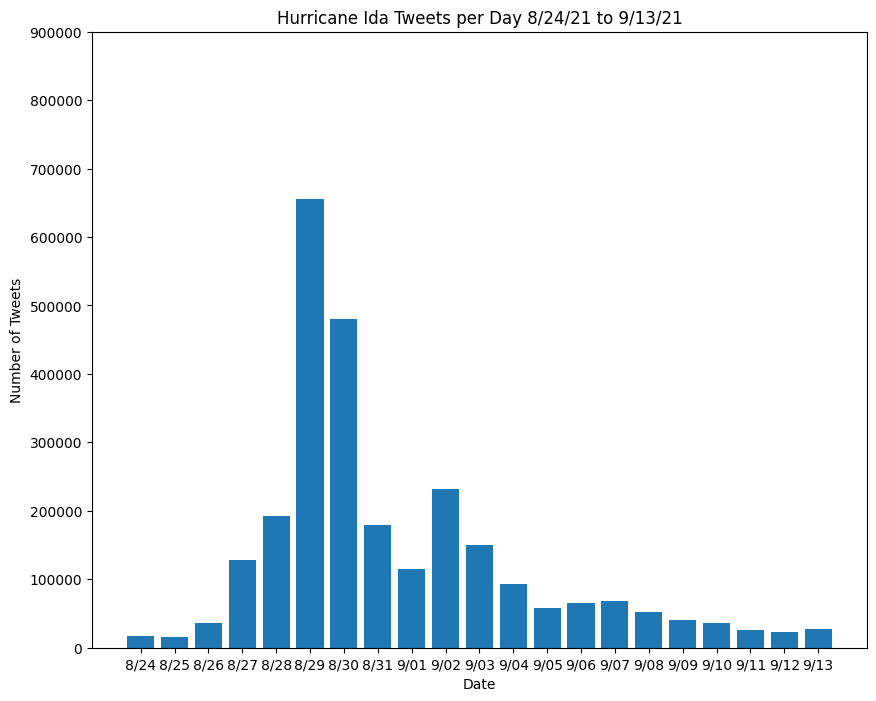

In [49]:
# Combined Datasets
ida_counts = {'2021-08-24': 17080, '2021-08-25': 16329, '2021-08-26': 36003, '2021-08-27': 128194, '2021-08-28': 192546, '2021-08-29': 656247, '2021-08-30': 480298, '2021-08-31': 179025, '2021-09-01': 115459, '2021-09-02': 232486, '2021-09-03': 149829, '2021-09-04': 92485, '2021-09-05': 57513, '2021-09-06': 65707, '2021-09-07': 67638, '2021-09-08': 52880, '2021-09-09': 40301, '2021-09-10': 36607, '2021-09-11': 25939, '2021-09-12': 23181, '2021-09-13': 27686}
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(10,8))
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.ylim(0, 9e5)
plt.title('Hurricane Ida Tweets per Day 8/24/21 to 9/13/21')
plt.bar(range(len(ida_counts)), list(ida_counts.values()))
plt.show()

## Max Wind Speeds

[35, 70, 80, 130, 105, 30, 30, 40, 45, 45]


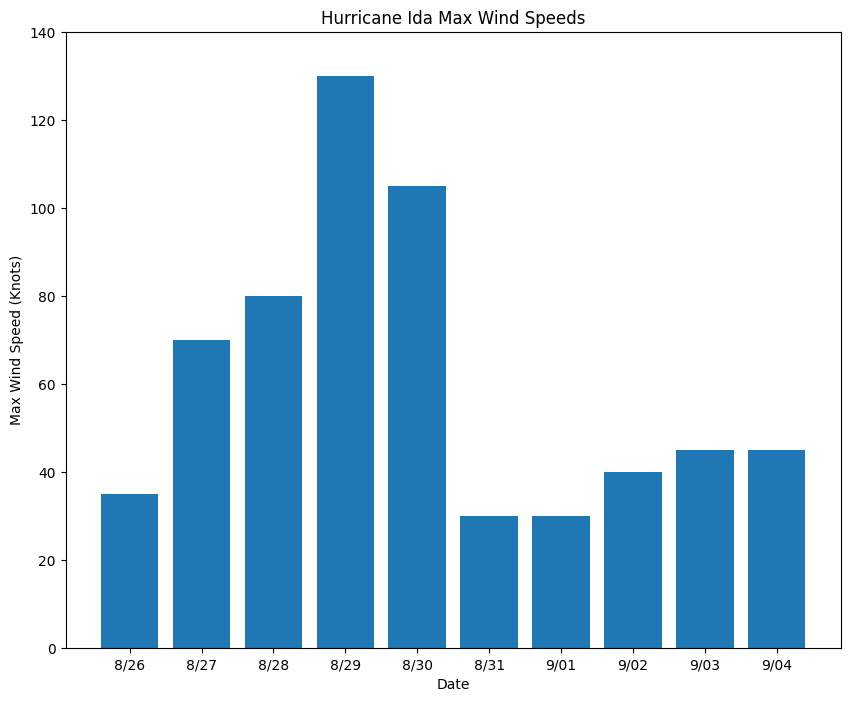

In [18]:
ida_track = pd.read_csv('ida_track.csv')
ida_track['Date'] = pd.to_datetime(ida_track['Date'], format='%Y%m%d')
max_wind = []
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 4)
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    sub = ida_track[ida_track['Date'].dt.date.astype('str') == str(start_date)]
    max_wind.append(max(sub['Max Wind']))
    start_date += delta
print(max_wind)
dates = pd.date_range(start='08/26/2021', end='09/04/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(10,8))
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Max Wind Speed (Knots)')
plt.ylim(0,140)
plt.title('Hurricane Ida Max Wind Speeds')
plt.bar(x=range(len(max_wind)), height=max_wind)
plt.show()

## Tweet Counts and Windspeeds

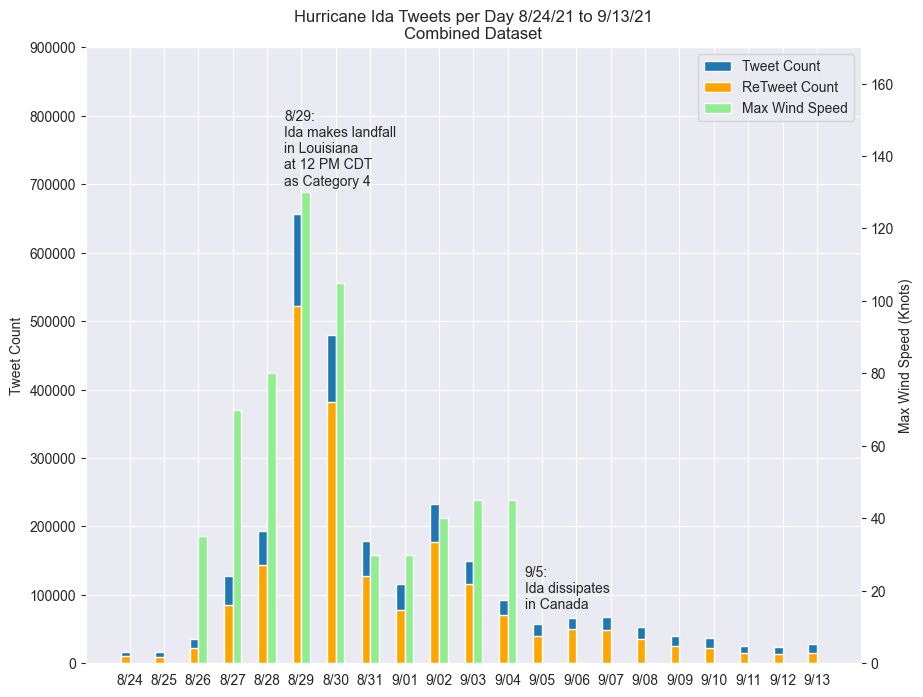

In [150]:
ida_counts = {'2021-08-24': 17080, '2021-08-25': 16329, '2021-08-26': 36003, '2021-08-27': 128194, '2021-08-28': 192546, '2021-08-29': 656247, '2021-08-30': 480298, '2021-08-31': 179025, '2021-09-01': 115459, '2021-09-02': 232486, '2021-09-03': 149829, '2021-09-04': 92485, '2021-09-05': 57513, '2021-09-06': 65707, '2021-09-07': 67638, '2021-09-08': 52880, '2021-09-09': 40301, '2021-09-10': 36607, '2021-09-11': 25939, '2021-09-12': 23181, '2021-09-13': 27686}
max_wind = [0, 0, 35, 70, 80, 130, 105, 30, 30, 40, 45, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0]
rt_count = [10366, 9226, 21636, 85784, 143264, 522081, 381485, 128073, 77603, 177645, 115547, 70800, 40326, 49582, 48389, 35409, 25371, 22231, 15094, 13792, 14538]

# data = {'Tweet_Count':list(ida_counts.values()), 'Max_Windspeed':max_wind}
# df = pd.DataFrame(data)
# df.plot(kind = 'bar' , secondary_y = 'Max_Windspeed' , rot = 0, figsize = (10,8), title = 'Hurricane Ida Tweets per Day 8/24/21 to 9/13/21')
# ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
# ax1.bar(range(len(rt_count)), rt_count, color='red', width=-0.25, align='edge')
# ax1.set_ylabel('Tweet Count')
# ax1.set_ylim(0,9e5)
# ax1.set_xticks(range(len(dates)), formatted_dates)
# ax2.set_ylabel('Max Wind Speed (Knots)')
# ax2.set_ylim(0,170)
# plt.text(4.5, 132, '8/29:\nIda makes landfall\nin Louisiana\nat 12 PM CDT\nas Category 4')
# plt.text(11.5, 15, '9/5:\nIda dissipates\nin Canada')

fig, ax1 = plt.subplots(figsize=(10,8))
ax1.bar(range(len(list(ida_counts.values()))), list(ida_counts.values()), width=-0.25, align='edge')
ax1.bar(range(len(rt_count)), rt_count, width=-0.25, align='edge', color='orange')
ax1.set_title('Hurricane Ida Tweets per Day 8/24/21 to 9/13/21\nCombined Dataset')
ax1.set_ylabel('Tweet Count')
ax1.set_ylim(0,9e5)
ax1.set_xticks(range(len(dates)), formatted_dates)
ax2 = ax1.twinx()
ax2.bar(range(len(max_wind)), max_wind, width=0.25, align='edge', color='lightgreen')
ax2.set_ylabel('Max Wind Speed (Knots)')
ax2.set_ylim(0,170)
plt.text(4.5, 132, '8/29:\nIda makes landfall\nin Louisiana\nat 12 PM CDT\nas Category 4')
plt.text(11.5, 15, '9/5:\nIda dissipates\nin Canada')
plt.grid(b=None)

fig.legend(['Tweet Count','ReTweet Count', 'Max Wind Speed'], bbox_to_anchor=(0.9, 0.88))

plt.savefig('tweets counts/tweets_per_day_ida4.png')
plt.show()

# Combining datasets

We have data searched on two different keywords, so it would be helpful to combine them during the analysis.

In [2]:
df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_2021-09-13.csv")
del df1[df1.columns[0]]
df1.drop(df1.iloc[:, -4:], inplace=True, axis=1)
df1.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,language,rt_user,rt_description,rt_verified,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet
0,tyler_bourque,Terrebonne high assistant 🏈🏀,False,NaN,247,Mon Sep 13 23:57:03 +0000 2021,1.437566e+18,@Louisiana5A @RenardSports Thib high was a mi...,0,Louisiana5A,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BudLatanville,Kind of a mess. Good for a quip. He/Him/They/T...,False,"East York, ON",245,Mon Sep 13 23:55:35 +0000 2021,1.437566e+18,"This reminds me that, based on how little cont...",0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HenryLeerhenry,Every day is Earth Day & I vote we start inves...,False,"Olathe, KS",4595,Mon Sep 13 23:53:38 +0000 2021,1.437565e+18,RT @nolaready: If you have #Ida roof damage &a...,50,NaN,en,nolaready,We are the City of NOLA emergency preparedness...,True,"New Orleans, LA",55787.0,Mon Sep 13 17:54:59 +0000 2021,1.437475e+18,If you have #Ida roof damage &amp; don't have ...,50.0
3,WeatherSullivan,Bloomberg News Reporter. Tweets are mine/ retw...,True,Boston,1495,Mon Sep 13 23:53:19 +0000 2021,1.437565e+18,"RT @rhjameson: Louisiana, grappling to recover...",1,NaN,en,rhjameson,"Editor, LatAm EcoGov @business - husband, dad,...",True,"New York, NY",3441.0,Mon Sep 13 23:37:29 +0000 2021,1.437561e+18,"Louisiana, grappling to recover from Hurricane...",1.0
4,BoneKnightmare,Fleet Admiral of #TheResistance since Day 0. N...,False,Parts Unknown,4293,Mon Sep 13 23:52:52 +0000 2021,1.437565e+18,RT @NOLAnews: One third of New Orleans still h...,16,NaN,en,NOLAnews,Latest news and updates from the Pulitzer Priz...,True,"New Orleans, LA",271619.0,Mon Sep 13 21:15:12 +0000 2021,1.437525e+18,One third of New Orleans still hasn't seen its...,16.0


In [3]:
df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_2021-09-13.csv")
del df2[df2.columns[0]]
df2.drop(df2.iloc[:, -4:], inplace=True, axis=1)
df2.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,language,rt_user,rt_description,rt_verified,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet
0,GregMercerMSN,DMs deleted. Charge Nurse on a psych unit. Hap...,False,NaN,3144,Mon Sep 13 23:59:59 +0000 2021,1.437567e+18,"@StephenKing I want a Hurricane Greg, just so ...",0,StephenKing,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rjorozcos,NaN,False,NaN,168,Mon Sep 13 23:59:57 +0000 2021,1.437567e+18,RT @breakingweather: Tropical Storm #Nicholas ...,40,NaN,en,breakingweather,Breaking weather alerts and timely weather new...,True,"State College, PA",1044559.0,Mon Sep 13 11:10:01 +0000 2021,1.437373e+18,Tropical Storm #Nicholas is expected to make l...,40.0
2,CamdenOakCrest,Schedule a tour today! 281.920.0800,False,"Houston, Texas",586,Mon Sep 13 23:59:50 +0000 2021,1.437567e+18,Hurricane season is here and it’s time to make...,0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nanobowers,"Father, husband, rubyist, chip designer, LSU, ...",False,NaN,58,Mon Sep 13 23:59:44 +0000 2021,1.437567e+18,Drunken hurricane staggers back to New Orleans...,0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Outtasites,Pork chop sandwishes,False,NaN,98,Mon Sep 13 23:59:43 +0000 2021,1.437567e+18,RT @JudgeKPGeorge: Is it a hurricane watch or ...,113,NaN,en,JudgeKPGeorge,"Proud Christian, Father, Husband. County Judge...",True,Fort Bend County,7237.0,Mon Sep 13 23:45:05 +0000 2021,1.437563e+18,Is it a hurricane watch or a warning? Fort Ben...,113.0


In [4]:
df = pd.concat([df1, df2])
df = df.sort_values('time')
df = df.reset_index(drop=True)
df.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,language,rt_user,rt_description,rt_verified,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet
0,amandatoryy,@motorbiscuit,False,NaN,168,Mon Sep 13 00:00:00 +0000 2021,1.437204e+18,General Lee will be back in no time! What was ...,0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RandomCAHBot,All views expressed are randomly generated and...,False,NaN,227,Mon Sep 13 00:00:03 +0000 2021,1.437204e+18,"After Hurricane Katrina, Sean Penn brought 𝗮 𝗺...",0,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ReserveOrg,Founded in 1922 and chartered by Congress in 1...,False,"Washington, DC",1441,Mon Sep 13 00:00:03 +0000 2021,1.437204e+18,@OKGuard headed to Louisiana in response to Hu...,0,OKGuard,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wtpickens1,Living on a little blue island in a sea of red.,False,"Austin, TX",634,Mon Sep 13 00:00:04 +0000 2021,1.437204e+18,RT @LinaHidalgoTX: Gov. @GregAbbott_TX and I a...,310,NaN,en,LinaHidalgoTX,Harris County Judge (executive of our nation’s...,True,"Harris County, TX",131831.0,Sun Sep 12 22:22:35 +0000 2021,1.437180e+18,Gov. @GregAbbott_TX and I are in touch about p...,310.0
4,Hurricane_765,Still waiting for someone to surprise dm me✨,False,NaN,7,Mon Sep 13 00:00:07 +0000 2021,1.437204e+18,RT @CryptoGeum: [ reroll ]\n\n$30 || P1380 || ...,4152,NaN,en,CryptoGeum,Shill & Promoter || DM for inquiries 📩 || vouc...,False,Seoul,80851.0,Sun Sep 12 23:58:06 +0000 2021,1.437204e+18,[ reroll ]\n\n$30 || P1380 || 393.000 IDR\n\n-...,4152.0


# Single Master Dataframe

In [ ]:
df_all = pd.DataFrame()
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    print(start_date)
    df = pd.DataFrame()
    if start_date >= datetime.date(2021, 8, 26):
        df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
        df = pd.concat([df1, df2])
    else:
        df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    df_all = pd.concat([df_all, df])
    start_date += delta
print(len(df_all))

In [111]:
# df_all = df_all.drop(df.columns[0], axis=1)
# df_all['time'] = pd.to_datetime(df_all['time'])
# df_all = df_all.sort_values(by='time')
print(df_all.shape)
df_all.head()

(2693433, 24)


,user,description,verified,location,followers,time,id,text,retweet,reply,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,Typhoon20002,"Pop-Culture fan, Politics, Loves democracy, Mo...",False,United States🇺🇸,177,Tue Aug 24 23:59:59 +0000 2021,1.430319e+18,RT @DRmetwatch: This morning in 1992 — 29 year...,5,NaN,...,East Coast,2109.0,Tue Aug 24 13:19:32 +0000 2021,1.430158e+18,This morning in 1992 — 29 years ago — the WSFO...,5.0,NaN,en,NaN,NaN
1,tersthebear,"this, that and the other thing",False,"Ottawa, Canada",127,Tue Aug 24 23:59:49 +0000 2021,1.430319e+18,@tracylager I've onky ever been to 1..Cancun. ...,0,tracylager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HoaAnhTuc146029,"Hi, I'm here!✈️🎡🕌🗿🌄🧢👒👑",False,NaN,54,Tue Aug 24 23:59:43 +0000 2021,1.430319e+18,RT @GridGamingIO: I'll give $100 to a random u...,4389,NaN,...,The Grid,271658.0,Tue Aug 24 16:07:37 +0000 2021,1.430200e+18,I'll give $100 to a random user who retweets t...,4389.0,NaN,en,NaN,NaN
3,trublesn,God’s timing is right,False,blessed 💫,135,Tue Aug 24 23:59:34 +0000 2021,1.430319e+18,RT @GridGamingIO: I'll give $100 to a random u...,4389,NaN,...,The Grid,271658.0,Tue Aug 24 16:07:37 +0000 2021,1.430200e+18,I'll give $100 to a random user who retweets t...,4389.0,NaN,en,NaN,NaN
4,PlanaWeather,"Forecasts & weather coverage for Atlantic, Bur...",False,South Jersey,378,Tue Aug 24 23:59:30 +0000 2021,1.430319e+18,🌀 8pm tropics outlook from the National Hurric...,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sentiment by Day/Hour

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)
avg_sentiment = []
ida_counts = []
avg_sentiment_hourly = []
ida_counts_hourly = []
analyzer = SentimentIntensityAnalyzer()

while start_date <= end_date:
    df = pd.DataFrame()
    if start_date >= datetime.date(2021, 8, 26):
        df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
        df = pd.concat([df1, df2])
    else:
        df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    # df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df['text'] = [remove_urls(tweet) for tweet in df['text']]
    df = df.drop_duplicates(subset=['text'])
    ida_counts.append(len(df))
    print(start_date)

    compound_scores = []
    for sentence in df['text']:
        vs = analyzer.polarity_scores(sentence)
        #print("{:-<65} {}".format(sentence, str(vs)))
        compound_scores.append(vs['compound'])
    avg_sentiment.append(statistics.mean(compound_scores))
    # print(statistics.mean(compound_scores))

    # for hour in range(24):
    #     compound_scores = []
    #     df_sub = df[df['time'].str[11:13] == str(hour).zfill(2)]
    #     ida_counts_hourly.append(len(df_sub))
    #     if len(df_sub['text']) > 0:
    #         for sentence in df_sub['text']:
    #             if type(sentence) != int:
    #                 vs = analyzer.polarity_scores(sentence)
    #                 #print("{:-<65} {}".format(sentence, str(vs)))
    #                 compound_scores.append(list(vs.values())[3])
    #         avg_sentiment_hourly.append(statistics.mean(compound_scores))
    #     else:
    #         avg_sentiment_hourly.append(0)

    start_date += delta

## Plot Sentiment by Day

In [71]:
pd.Series(avg_sentiment).describe()

count    21.000000
mean      0.044658
std       0.039353
min      -0.040796
25%       0.019263
50%       0.048715
75%       0.070510
max       0.114749
dtype: float64

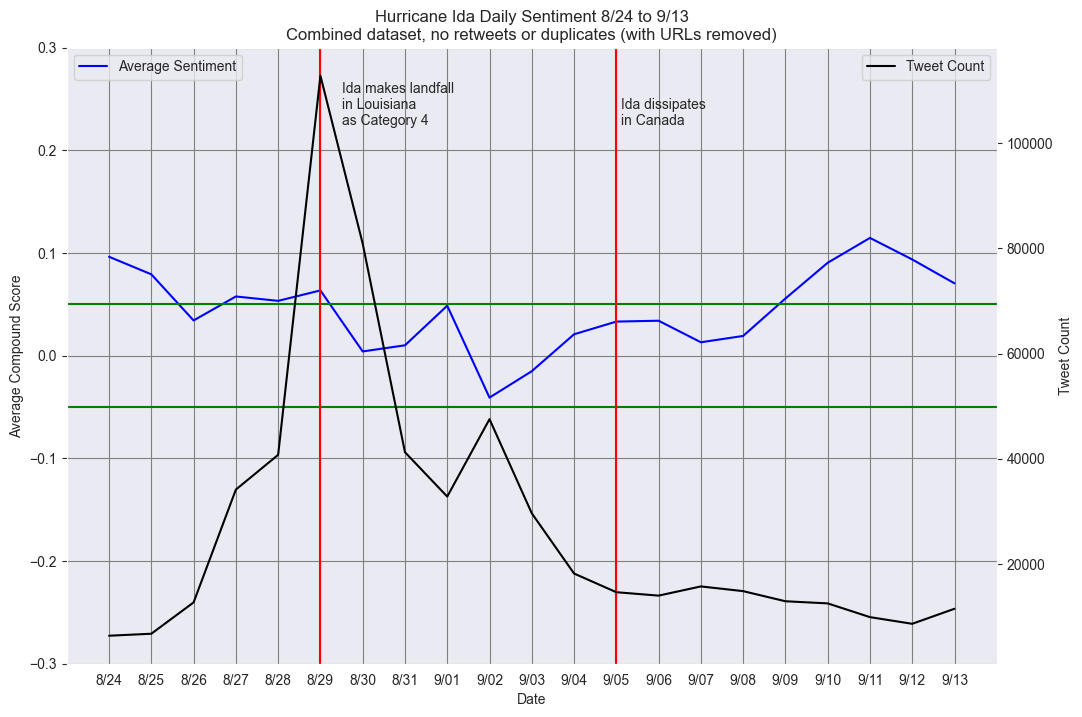

In [21]:
# daily, storm ida dataset, no retweets or duplicates
# avg_sentiment = [-0.012052424800491094, 0.03498209083119109, 0.024268395162943227, 0.026317105934364905, -0.10715553180117585, -0.04543845777233782, -0.0822336048879837, -0.2063763122476447, -0.2373101629384148, -0.19122349551856593, -0.15488313609467455, -0.15128189158016148, -0.20969854452054795, -0.21840665322580646, -0.13758865384615385, -0.12669507772020724, -0.09953448275862069, -0.12508311688311688, -0.11207890625]
# daily, combined dataset, no retweets or duplicates
# avg_sentiment = [0.0920172585013542, 0.0792331340734415, 0.02690113913751017, 0.0482891275096958, 0.041497891744122474, 0.05525841628813505, -0.010804174425150479, -0.00205883995748317, 0.03523305061559508, -0.05721815065899106, -0.03044471579074471, 0.0055747494033412896, 0.017824486137667305, 0.021629987892691008, 0.027213173812965043, 0.006326166519564579, 0.04794900562337128, 0.08325294326998363, 0.1062287846282996, 0.08873051891891892, 0.0680368695516812]
# daily, combined dataset, no retweets or duplicates (with URLs removed)
ida_counts = [6320, 6698, 12656, 34124, 40736, 112873, 80933, 41244, 32795, 47529, 29617, 18157, 14599, 13951, 15700, 14802, 12878, 12472, 9858, 8588, 11450]
avg_sentiment = [0.09640365506329114, 0.07927078232308152, 0.034357640644753475, 0.05770702438166686, 0.053445139434406916, 0.0636080967104622, 0.004170029530599385, 0.010136941130831151, 0.04871528281750267, -0.04079638536472469, -0.015068896242023162, 0.020878834609241614, 0.03324940749366395, 0.03408918357107017, 0.01310015923566879, 0.019263281988920418, 0.05572018947041466, 0.09054283194355356, 0.11474909717995536, 0.09375751047973917, 0.07050958951965065]
plt.figure(figsize=(12,8), edgecolor='white')
plt.plot(avg_sentiment, label='Average Sentiment', color='blue')
plt.legend(loc='upper left')
plt.grid(color='gray')
# axes
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.xticks(np.arange(0, len(avg_sentiment)), formatted_dates)
plt.ylim([-.3, .3])
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
# thresholds
plt.axhline(y=.05, color='green')
plt.axhline(y=-.05, color='green')
# timeline
bottom, top = plt.ylim()
landfall = len(dates) - 16
plt.axvline(x=landfall, color='red')
plt.text(landfall+.5, top*.75, 'Ida makes landfall\nin Louisiana\nas Category 4')
dissipation = len(dates) - 9
plt.axvline(x=dissipation, color='red')
plt.text(dissipation+.1, top*.75, 'Ida dissipates\nin Canada')
# tweet counts
plt.twinx()
plt.plot(ida_counts, label='Tweet Count', color = 'black')
plt.ylabel('Tweet Count')
plt.legend()
plt.grid(b=None)
# title
plt.title('Hurricane Ida Daily Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nCombined dataset, no retweets or duplicates (with URLs removed)')

plt.savefig('sentiment analysis/Ida/sentiment_daily_ida3.png')
plt.show()

## Plot Sentiment by Hour

In [2]:
avg_sentiment_hourly = [0.11521834862385322, 0.0786433908045977, 0.06636989619377164, 0.060822321428571434, 0.14217872340425533, 0.06655089285714286, -0.05459714285714286, 0.08101826086956522, 0.07662521008403361, 0.12042053571428572, 0.031802890173410404, 0.11515527426160338, 0.05427717717717718, 0.12346263157894737, 0.04303102409638554, 0.08595740740740741, 0.18414473007712082, 0.12424195979899498, 0.11364322033898305, 0.07612461059190032, 0.0985625, 0.0939290780141844, 0.1135596214511041, 0.12327153024911032, 0.05548507462686567, 0.08033117870722434, 0.05818978873239437, 0.08888745519713262, 0.05099702380952381, 0.03527142857142857, 0.0376698275862069, 0.07538867924528302, 0.08446796116504854, 0.051133333333333336, 0.14199455445544554, 0.14683613445378152, 0.06536959064327486, 0.06554460641399418, 0.09735452196382428, 0.0939083932853717, 0.07809460227272727, 0.12536956521739132, 0.10380437788018433, 0.0823841095890411, 0.0746708446866485, 0.08320027855153203, 0.005846866485013627, 0.06715169230769232, 0.09262996941896025, 0.07031371951219512, 0.029932131147540984, 0.12521784037558686, 0.05743254437869823, -0.003106923076923074, 0.12688582677165355, 0.041480357142857145, 0.0951948275862069, 0.053076158940397355, 0.07933512396694214, 0.0928304918032787, 0.07086796116504855, 0.12285939086294416, 0.01666833558863329, -0.01628399602385686, -0.003085664739884392, 0.014518925831202047, 0.03195568627450981, 0.016397552019583844, 0.010985570890840653, 0.025022455679579777, 0.03515458984375, 0.02704987654320988, 0.050523001402524546, 0.021335690789473685, 0.038878610354223436, 0.034660436432637574, 0.0675352693208431, 0.05255365296803653, 0.06010374531835206, 0.03274545454545455, 0.0913482233502538, 0.10993419203747072, 0.05677013752455796, 0.0749106325706595, 0.08667991596638655, 0.06885891286970423, 0.053073059936908515, 0.06759184290030211, 0.05576292442497262, 0.08723439306358381, 0.06253929618768328, 0.06977468780019212, 0.042991819343843204, 0.025077542969850663, 0.06431601763409257, 0.04415242385242386, 0.05150646913580247, 0.050789966555183946, 0.05146693002257336, 0.03262973137973138, 0.02471631912964642, -0.001013906447534765, -0.0024791512915129134, 0.04389283154121864, 0.08136912181303116, 0.025110848126232745, 0.021845129870129872, 0.07731605068637804, 0.06544353099730459, 0.06347816473189608, 0.0735775870524767, 0.04598849015317286, 0.061954502774221085, 0.07143437622213532, 0.06545592286501377, 0.05906633888048412, 0.05662667182064167, 0.042088650196920874, 0.06244397024275646, 0.048263732681336595, 0.06526541417591802, 0.0767451967063129, 0.0700188472095151, 0.07190338541666667, 0.050119770253929864, 0.05895215946843854, 0.009578093977498345, 0.018730950861518825, 0.027112617702448213, 0.012322767497988737, 0.06520300798035605, 0.07252504409171076, 0.05704509643483343, 0.07695851088201604, 0.08206062762859916, 0.0767743876284005, 0.09081396004700353, 0.07850165326184093, 0.07043348922902494, 0.05655065239700924, 0.04188714974389877, 0.04522706011615131, 0.04401513437057992, 0.0358382461311717, 0.01990696705041683, 0.01472056659308315, -0.02058847279110591, -0.01624870857142857, -0.012217722602739725, -0.02302302706824247, -0.005687671232876712, -0.02735882053889171, 0.015253018181818182, -0.07038587360594796, -0.017782533889468193, 9.513968618446289e-05, 0.015331890459363957, 0.023421717858113617, 0.025109125766871167, 0.006419995146809027, 0.006687229862475443, 0.013378663843801458, 0.0009127369219105388, 0.015297214484679666, 0.02863671875, 0.016694039735099336, 0.02481413368806119, 0.00019460035523978693, 0.02514221190375686, 0.020807519157088124, -0.0005932262920220763, 0.005174659090909092, 0.010798230088495576, -0.00701325842696629, -0.003007407407407407, -0.0053599999999999984, 0.0032588855421686763, -0.046956811594202896, -0.049496162046908314, -0.026353353893600617, 0.0006523076923076923, 0.01109362186788155, 0.007000599571734476, 0.023300970425138633, 0.012913935483870969, 0.034288893864755934, 0.02188933143669986, 0.01927373929590866, 0.01943452166064982, -0.000625021607605877, 0.020211377245508984, 0.02388402489626556, 0.045228, 0.020232197496522948, 0.02323895800933126, 0.009455654496883348, 0.044366461916461916, 0.19502983970406906, 0.16229936507936507, 0.021737151248164468, 0.08640038834951456, 0.10218095238095239, 0.011253081761006293, 0.0718179889298893, 0.0518693083573487, 0.07489847371396269, 0.0228771397018222, 0.07220066334991708, 0.05528139990210475, 0.03892602150537634, 0.03525735222276502, 0.05248682170542636, 0.04245545898967952, 0.04039380479251899, 0.025998342214328004, 0.021985769656699888, 0.02527857559836544, 0.0009123839009287939, -0.033676304533789565, -0.044478680203045684, -0.046788091752074185, -0.0822679355783309, -0.10125718918918919, -0.10795854503464203, -0.12163443072702332, -0.06386725082146769, -0.03888738601823708, -0.06756739904988124, -0.03755624430264357, -0.05149992012779552, -0.055029958677685946, -0.045279825783972126, -0.033347507055503295, -0.03278072976054732, -0.022605872483221476, -0.03636065934065934, -0.0050650320806599446, -0.01686976856316297, -0.0697399801093983, -0.03422237762237762, -0.024191623036649214, -0.052054831782390835, -0.041829420505200596, -0.03218989983305509, -0.07282569296375266, -0.06909474412171508, -0.019295760233918127, -0.05613085501858736, -0.07733222222222222, -0.08229808823529411, -0.058839789196310936, -0.05010263671875, -0.03687321699544765, -0.03068440366972477, -0.009471799516908212, 0.012784950610110401, 0.014503246753246752, 0.0173104621309371, 0.01974149214659686, 0.04522146060217809, 0.011629499323410014, 0.007252205882352944, 0.0084515953307393, 0.022711689419795223, 0.033103006012024046, 0.0398252358490566, 0.04914494649227111, 0.0034170769230769233, 0.024012031558185404, 0.0022729528535980173, -0.01279607250755287, -0.028188753056234715, -0.010833653846153845, 0.026304832713754646, -0.012102714932126698, 0.06440382513661203, 0.011832989690721649, 0.02844073199527745, 0.04325478011472276, 0.04288031578947368, 0.02458766859344894, -0.019189174800354925, 0.004495987328405492, 0.035803202479338846, -0.006554795737122557, 0.029109903593339176, 0.021754845580404688, 0.03864506329113924, 0.05841774647887324, 0.026716107382550335, -0.01955261324041812, 0.023776041666666668, 0.04275685071574642, -0.0025177966101694906, -0.01728497854077253, -0.006220869565217392, -0.019187391304347826, -0.008772962962962962, 0.02717309941520468, 0.08953239740820734, 0.029641428571428572, 0.004343098591549297, 0.016996442185514615, 0.04920381406436233, 0.058587529411764705, 0.05093410475030451, 0.023792457142857146, 0.05049771490750816, 0.04177578814627995, 0.04944868073878628, 0.030673033707865168, 0.05535449515905947, 0.03111198630136986, 0.04151917355371901, 0.06507791095890411, -0.0012766932270916313, -0.030613043478260868, 0.008584751773049647, 0.0518984496124031, -0.06670366300366301, -0.024646413502109703, -0.026369551282051283, 0.028427076923076923, 0.022975352112676057, 0.013033274021352313, 0.05457407407407407, 0.06733388625592417, 0.04649375, 0.031107654921020658, 0.0575254854368932, 0.04701083627797409, 0.014515056461731495, 0.03405470914127424, 0.07140181058495822, 0.038171448275862066, 0.04796519083969466, 0.050258527827648114, 0.01837040998217469, 0.011664399092970523, 0.053032648401826483, 0.04703921568627451, 0.008575744680851064, -0.023748660714285712, -0.04302852233676976, 0.03212821782178218, 0.0012394833948339472, 0.034154216867469875, -0.024253521126760564, 0.018809851301115243, 0.04218333333333334, 0.0005275618374558308, 0.013038870792616722, 0.03401943430656935, 0.025281182795698926, -0.01082334928229665, 0.027121559191530316, 0.006515538194444445, 0.0010829368334700582, 0.008352789256198347, -0.018211627906976745, 0.006201854493580601, 0.012280253878702399, 0.015950000000000002, -0.022435254237288135, -0.02542395604395604, -0.036842611683848794, 0.003700427350427353, -0.09830060422960725, -0.02256036036036036, -0.010019865319865318, 0.010393296089385475, -0.007162678571428571, 0.03064899135446686, -0.006869162436548224, 0.026036507936507938, 0.06185896834701055, 0.03758689265536723, 0.0629521472392638, 0.041603013698630134, 0.02322085048010974, 0.03240733333333334, 0.027209495192307694, 0.03576753782668501, 0.060980184331797235, 0.026657713248638838, 0.030283574007220215, -0.018411827956989247, 0.03584988962472406, 0.030576060606060607, -0.0005714285714285723, 0.036428795811518325, -0.03339367588932806, 0.05450271739130435, 0.049904777070063695, -0.014688714733542321, 0.02346273148148148, 0.019576545454545454, 0.07875967302452316, 0.0730777922077922, 0.12212398286937902, 0.07976503225806451, 0.06408794326241135, 0.07398005148005148, 0.056907369942196535, 0.06311248357424441, 0.06955366972477064, 0.09806953528399312, 0.07117593750000001, 0.05772579365079365, 0.1562075329566855, 0.056324807692307695, 0.09839767441860466, 0.08632065573770492, 0.050121078431372555, 0.04678982300884956, 0.11473566176470588, 0.04478590909090909, 0.11319153846153847, 0.09429090909090909, 0.08479355509355509, 0.08230623916811092, 0.09996998616874135, 0.07332994722955145, 0.1278367105263158, 0.11513809523809523, 0.06624748677248678, 0.07585721997300945, 0.11877166172106825, 0.07676223479490807, 0.09577262103505843, 0.1048659649122807, 0.06465530726256984, 0.12034468937875752, 0.07514878048780488, 0.056209523809523806, 0.05698886310904872, 0.0933702005730659, 0.07485125000000001, 0.06884084507042254, 0.061411787072243346, 0.11000116731517509, 0.07062883895131086, 0.11693837638376384, 0.13451511627906976, 0.13834672304439746, 0.08035286738351255, 0.22335461538461537, 0.15162263157894737, 0.13038027079303674, 0.06606951983298538, 0.13406626794258372, 0.12988736842105264, 0.15437655860349128, 0.1115356783919598, 0.0864614420062696, 0.10312790697674419, 0.1572, 0.11270535211267606, 0.0587843949044586, 0.10706822429906541, 0.17830528846153845, 0.07762341772151898, 0.12116906474820144, 0.15033717948717948, 0.11512635658914729, 0.10784437869822486, 0.13275479452054795, 0.07785111111111111, 0.112909243697479, 0.14496831955922865, 0.0639, 0.0749296511627907, 0.12901977818853974, 0.0860359437751004, 0.01553001876172608, 0.06636704119850187, 0.08103847826086957, 0.059071278458844134, 0.08177538994800693, 0.1158192439862543, 0.10156733870967742, 0.04713626126126126, 0.09626166219839143, 0.038237600000000004, 0.07957940074906367, 0.021021120689655174, 0.020823497267759568, 0.07285764705882353, 0.05022177419354839, 0.10391629213483146, 0.04513333333333333, 0.05530911270983213, 0.14170929292929293, 0.08335092748735244, 0.0868180250783699, 0.052144054054054055, 0.10878586309523809, 0.07206052227342549, 0.10627496038034866, 0.08399493670886075, 0.020489772727272728, 0.06993723252496434, 0.034335632183908046, 0.05869463986599665]
ida_counts_hourly = [327, 348, 289, 224, 141, 112, 70, 115, 119, 112, 173, 237, 333, 380, 332, 378, 389, 398, 354, 321, 288, 282, 317, 281, 268, 263, 284, 279, 168, 133, 116, 106, 103, 135, 202, 238, 342, 343, 387, 417, 352, 345, 434, 365, 367, 359, 367, 325, 327, 328, 305, 213, 169, 130, 127, 112, 116, 151, 242, 305, 412, 591, 739, 1006, 865, 782, 765, 817, 797, 1523, 1024, 810, 713, 608, 734, 1054, 2135, 438, 267, 275, 197, 427, 509, 743, 1190, 1251, 1585, 1986, 1826, 2768, 2387, 2082, 2347, 3549, 2722, 2331, 2025, 1794, 1772, 1638, 1103, 791, 542, 558, 353, 507, 616, 947, 1484, 1809, 2039, 2285, 2343, 2557, 2541, 2644, 2587, 2793, 2554, 2454, 2342, 2186, 2186, 2304, 1654, 1505, 1511, 1567, 1062, 1243, 1629, 2835, 8555, 8730, 9273, 8859, 8510, 8952, 7056, 6821, 6638, 6371, 5656, 5428, 5038, 5436, 5127, 4375, 3504, 2623, 2044, 1967, 1375, 1614, 1918, 2613, 3396, 3679, 3912, 4121, 4072, 4251, 3957, 3590, 3328, 3171, 3007, 2815, 2369, 2088, 1993, 1760, 1243, 890, 675, 790, 664, 690, 938, 1297, 1755, 2195, 2335, 2164, 2325, 2233, 2109, 2102, 2216, 2314, 2171, 1928, 1450, 1438, 1286, 1123, 814, 811, 630, 681, 515, 588, 795, 1084, 1388, 1769, 1811, 1809, 2043, 1860, 2047, 1806, 1841, 1711, 1689, 1806, 1713, 1938, 2338, 2758, 2049, 1366, 925, 866, 729, 913, 1316, 1684, 2194, 2504, 2904, 2870, 3189, 2631, 2384, 2275, 2182, 2074, 2011, 1716, 1528, 1397, 1346, 1198, 938, 723, 684, 807, 540, 680, 759, 1024, 1318, 1526, 1656, 1721, 1694, 1558, 1528, 1561, 1478, 1496, 1285, 1172, 998, 848, 841, 650, 507, 403, 331, 409, 312, 269, 442, 549, 679, 847, 1046, 950, 1038, 1127, 947, 968, 1126, 1141, 939, 790, 710, 596, 574, 576, 489, 354, 233, 345, 230, 270, 342, 463, 630, 710, 787, 839, 850, 821, 875, 919, 793, 758, 712, 723, 584, 605, 584, 502, 414, 282, 258, 273, 237, 312, 325, 426, 562, 702, 844, 928, 823, 824, 849, 797, 722, 718, 725, 655, 557, 561, 441, 438, 306, 235, 224, 291, 202, 271, 332, 426, 538, 756, 849, 921, 1096, 930, 1045, 1039, 1152, 1219, 968, 903, 701, 709, 718, 590, 455, 291, 234, 331, 222, 297, 358, 560, 694, 788, 882, 853, 885, 815, 730, 729, 750, 832, 727, 651, 551, 554, 465, 453, 330, 259, 191, 253, 184, 314, 319, 432, 550, 734, 770, 934, 775, 705, 777, 692, 761, 654, 581, 640, 504, 531, 520, 387, 305, 204, 226, 272, 220, 260, 341, 481, 577, 723, 758, 760, 819, 756, 741, 674, 707, 599, 570, 537, 499, 451, 420, 431, 349, 240, 213, 263, 257, 267, 271, 344, 473, 558, 910, 570, 517, 479, 418, 380, 401, 398, 319, 430, 394, 355, 314, 214, 208, 158, 139, 156, 129, 169, 146, 225, 357, 363, 449, 516, 541, 498, 533, 534, 460, 571, 577, 582, 496, 444, 373, 375, 267, 232, 183, 170, 124, 178, 273, 417, 495, 593, 638, 740, 672, 651, 631, 711, 880, 701, 609, 597]


In [79]:
pd.Series(avg_sentiment_hourly).describe()

count    504.000000
mean       0.041782
std        0.051035
min       -0.121634
25%        0.011535
50%        0.042606
75%        0.073392
max        0.223355
dtype: float64

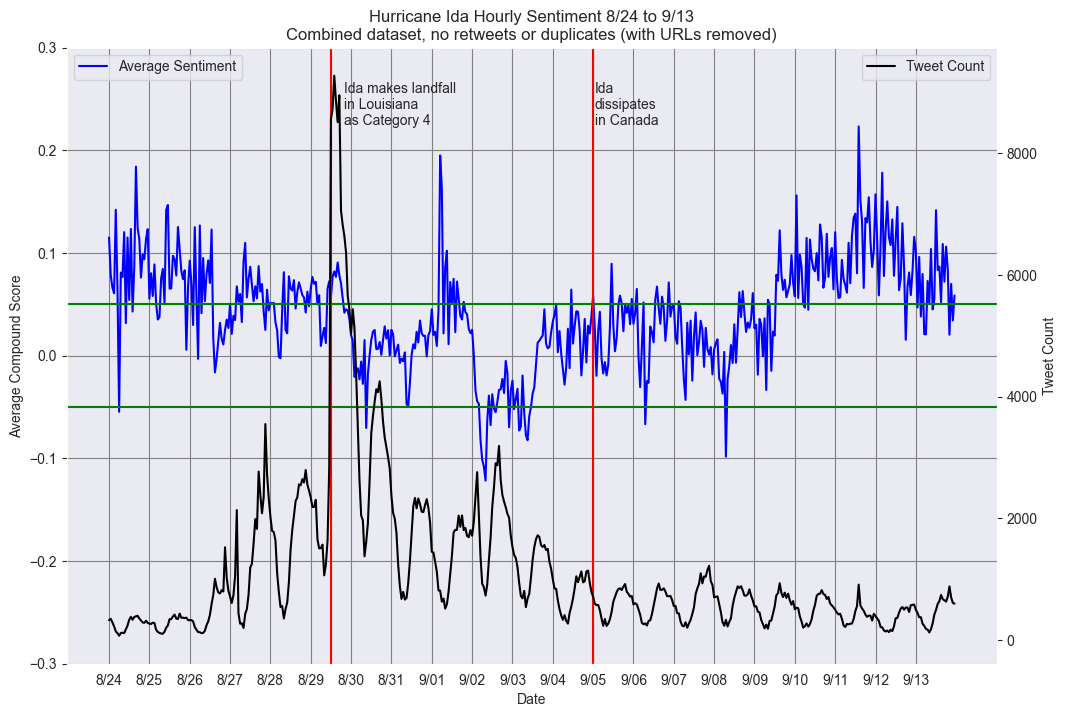

In [3]:
plt.figure(figsize=(12,8))
plt.plot(avg_sentiment_hourly, label='Average Sentiment', color='blue')
plt.legend(loc='upper left')
plt.grid(color='gray', axis='both')
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.xticks(np.arange(0, len(avg_sentiment_hourly), 24), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.ylim([-.3, .3])
top = 0.3
plt.title('Hurricane Ida Hourly Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nCombined dataset, no retweets or duplicates (with URLs removed)')
# positive, neutral, negative thresholds
plt.axhline(y=.05, color='green')
plt.axhline(y=-.05, color='green')
# storm timeline
landfall = 24*(len(dates) - 15.5)
plt.axvline(x=landfall, color='red')
plt.text(landfall+8,top*.75,'Ida makes landfall\nin Louisiana\nas Category 4')
dissipation = 24*(len(dates) - 9)
plt.axvline(x=dissipation, color='red')
plt.text(dissipation+1,top*.75,'Ida\ndissipates\nin Canada')
# tweet counts
plt.twinx()
plt.plot(ida_counts_hourly, label='Tweet Count', color='black')
plt.ylabel('Tweet Count')
plt.legend()
plt.grid(b=None)

plt.savefig('sentiment analysis/Ida/sentiment_hourly_ida2.png')
plt.show()

# Dataframe with Scores

In [13]:
date = '09-02'
analyzer = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
compound = []

df1 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_2021-" + date + ".csv")
df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_2021-" + date + ".csv")
df = pd.concat([df1, df2])
df = df[~df['text'].str.startswith("RT @", na=False)]
df['text'] = [remove_urls(tweet) for tweet in df['text']]
df = df.drop_duplicates(subset=['text'])
df = pd.DataFrame({'time': df['time'],'user': df['user'], 'tweet': df['text']})

for sentence in df['tweet']:
    vs = analyzer.polarity_scores(sentence)
    neg.append(vs['neg'])
    neu.append(vs['neu'])
    pos.append(vs['pos'])
    compound.append(vs['compound'])

df['neg'] = neg
df['neu'] = neu
df['pos'] = pos
df['compound'] = compound
df.sort_values(by='compound', ascending=True)

,time,user,tweet,neg,neu,pos,compound
97627,Thu Sep 02 14:46:48 +0000 2021,magnolia23530,A hurricane disaster 2 hour's for 4 packet of ...,0.662,0.338,0.000,-0.9955
170648,Thu Sep 02 03:46:30 +0000 2021,Aalayahm912,😭😭😭😭 IK YALLLL remember the last hurricane pat...,0.374,0.626,0.000,-0.9862
11299,Thu Sep 02 15:22:15 +0000 2021,CheckAnfro,😭😭😭 @CoachDame_BSM was worried about IDA for m...,0.457,0.543,0.000,-0.9836
108142,Thu Sep 02 13:52:33 +0000 2021,Dianna_Bee2,I'm so pissed off! I'm dealing with the afterm...,0.449,0.524,0.027,-0.9834
67041,Thu Sep 02 17:12:40 +0000 2021,Quayla12,NAW BECAUSE WTF IS THIS WEATHER ON THE EAST CO...,0.464,0.493,0.043,-0.9825
...,...,...,...,...,...,...,...
8745,Thu Sep 02 22:52:22 +0000 2021,serge_gomez,@PiperPerabo @PressSec Piper good evening I ho...,0.000,0.543,0.457,0.9940
40404,Thu Sep 02 19:37:19 +0000 2021,Zeentlezee4,In all this Dineo and Elliot hurricane it Boma...,0.016,0.579,0.405,0.9951
90100,Thu Sep 02 15:23:34 +0000 2021,Hurricane_Tiana,@boosoverbooks 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂boys f...,0.228,0.358,0.413,0.9959
135911,Thu Sep 02 10:26:48 +0000 2021,Hurricane_Tiana,@wofayaw98 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂,0.217,0.348,0.435,0.9967


In [14]:
df['compound'].describe()

count    47529.000000
mean        -0.040796
std          0.486428
min         -0.995500
25%         -0.440400
50%          0.000000
75%          0.330900
max          0.997300
Name: compound, dtype: float64

# Wordclouds by Day

In [ ]:
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

while start_date <= end_date:
    df = pd.read_excel(r"C:\Users\xiaod\Downloads\Hurricane Ida\Hurricane Ida\storm ida_" + str(start_date) + ".xlsx")
    text = " ".join(remove_urls(tweet) for tweet in df['text'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)

    # Display the generated image:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    wordcloud.to_file("ida wordclouds/" + str(start_date) + "_wordcloud.png")

    start_date += delta

# Wordclouds by Phase

Separate Storm into 3 Phases: Pre-hurricane, during-hurricane, and post-hurricane

In [4]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

text = ''
count = 0

while start_date <= end_date:
    if start_date == datetime.date(2021, 8, 29):
        # wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
        # wordcloud.to_file("wordclouds/Ida/hospitals/ida_pre_hurricane.png")
        # print('Pre-hurricane:\n', list(wordcloud.words_.items())[0:10])
        print(count)
        count = 0
        text = ''
    elif start_date == datetime.date(2021, 9, 6):
        # wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
        # wordcloud.to_file("wordclouds/Ida/hospitals/ida_during_hurricane.png")
        # print('During-hurricane:\n', list(wordcloud.words_.items())[0:10])
        print(count)
        count = 0
        text = ''
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df[df['text'].str.lower().str.contains('hospital')]
    # text += " ".join(remove_urls(tweet) for tweet in df['text'])
    count += len(df)
    start_date += delta

# wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
# wordcloud.to_file("wordclouds/Ida/hospitals/ida_post_hurricane.png")
# print('Post-hurricane:\n', list(wordcloud.words_.items())[0:10])
print(count)

12204
40162
1056


# Keyword Search

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# keywords = ['shut', 'down', 'capacity', 'full', 'limit', 'out']
hospital_status = pd.DataFrame()

while start_date <= end_date:
    print(start_date)
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df = df[~df['text'].str.startswith("@", na=False)]
    df = df.drop_duplicates(subset=['text'])
    df = df.reset_index(drop=True)

    for i in range(len(df['text'])):
        tweet = df['text'][i]
        if 'hospital' in tweet:
            hospital_status = hospital_status.append(df.loc[i], ignore_index=True)

    start_date += delta

In [114]:
hospital_status['time'] = pd.to_datetime(hospital_status['time'])
hospital_status = hospital_status.sort_values('time').reset_index(drop=True)
print(hospital_status.shape)
hospital_status.head()

(3478, 25)


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,15612,barfing_noises,I'm poor please help https://t.co/enYNjAfAAS,False,Stoner's Pot Palace,51,2021-08-24 01:55:20+00:00,1.429986e+18,If it wasn't for Matt Gaetz and MTG this guy w...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12189,Jay_Lee_C,I do better with animals than people 🐕🐕\n#Resi...,False,Florida,8231,2021-08-24 10:32:07+00:00,1.430116e+18,The same ppl that refuse to evacuate during Fl...,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11316,alexa_carias,🇭🇳|| tpwk||⚖️||she/her||,False,"North Carolina, USA",162,2021-08-24 12:09:07+00:00,1.430140e+18,+ imagine being sent to the hospital because y...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10866,ArrayArch,We discover optimal solutions. Over 30 years' ...,False,DC/FL/MA/NY/PA,2948,2021-08-24 12:45:00+00:00,1.430149e+18,Array's Design Practice Leader Kent Doss share...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6758,STEAMcultivator,Independent Consultant for @Participate | Form...,False,Florida,2187,2021-08-24 16:28:36+00:00,1.430205e+18,Governor @RonDeSantisFL recently declared a #s...,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
hospital_status['text'] = hospital_status['text'].apply(lambda x: remove_urls(str(x)))
hospital_status = hospital_status.drop_duplicates(subset='text')

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

text = ''

sub_df = hospital_status[hospital_status['time'] <= '2021-08-28']
for tweet in sub_df['text']:
    text += remove_urls(tweet)
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("ida wordclouds/hospitals/pre_hurricane.png")
print('Pre-hurricane:\n', list(wordcloud.words_.items())[0:10])

sub_df = hospital_status[hospital_status['time'] >= '2021-08-29']
sub_df = sub_df[sub_df['time'] <= '2021-09-05']
for tweet in sub_df['text']:
    text += remove_urls(tweet)
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("ida wordclouds/hospitals/during_hurricane.png")
print('During-hurricane:\n', list(wordcloud.words_.items())[0:10])

sub_df = hospital_status[hospital_status['time'] >= '2021-09-06']
for tweet in sub_df['text']:
    text += remove_urls(tweet)
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("ida wordclouds/hospitals/post_hurricane.png")
print('Post-hurricane:\n', list(wordcloud.words_.items())[0:10])

# wordcloud.to_file("ida wordclouds/storm_phases/hospital_statuses.png")
# print('Hospital Statuses:\n', list(wordcloud.words_.items())[0:10])

Pre-hurricane:
 [('Ida', 1.0), ('hospital', 0.9333333333333333), ('Hurricane', 0.6), ('Storm', 0.6), ('Covid', 0.6), ('Louisiana', 0.5333333333333333), ('will', 0.3333333333333333), ('coast', 0.3333333333333333), ('evacuation', 0.3333333333333333), ('already', 0.26666666666666666)]
During-hurricane:
 [('hospital', 1.0), ('storm', 0.6292682926829268), ('Hurricane Ida', 0.5902439024390244), ('patient', 0.3073170731707317), ('Louisiana', 0.3024390243902439), ('Ida', 0.2780487804878049), ('COVID', 0.25365853658536586), ('roof', 0.21951219512195122), ('Louisiana hospital', 0.18536585365853658), ('path', 0.16585365853658537)]
Post-hurricane:
 [('hospital', 1.0), ('storm', 0.5990566037735849), ('Hurricane Ida', 0.589622641509434), ('Louisiana', 0.3018867924528302), ('patient', 0.2971698113207547), ('Ida', 0.2783018867924528), ('COVID', 0.24528301886792453), ('roof', 0.21226415094339623), ('Louisiana hospital', 0.1792452830188679), ('s', 0.16037735849056603)]


In [115]:
# hospital_status['text'] = hospital_status['text'].apply(lambda x: remove_urls(str(x)))
# hospital_status = hospital_status.drop_duplicates(subset=['text'])

scores = pd.DataFrame()
scores['user'] = hospital_status['user']
scores['time'] = hospital_status['time']
scores['tweet'] = hospital_status['text']
neg = []
neu = []
pos = []
compound = []
analyzer = SentimentIntensityAnalyzer()

for sentence in hospital_status['text']:
    vs = analyzer.polarity_scores(sentence)
    neg.append(vs['neg'])
    neu.append(vs['neu'])
    pos.append(vs['pos'])
    compound.append(vs['compound'])

scores['neg'] = neg
scores['neu'] = neu
scores['pos'] = pos
scores['compound'] = compound
scores.head()

,user,time,tweet,neg,neu,pos,compound
0,barfing_noises,2021-08-24 01:55:20+00:00,If it wasn't for Matt Gaetz and MTG this guy w...,0.244,0.756,0.000,-0.9045
1,Jay_Lee_C,2021-08-24 10:32:07+00:00,The same ppl that refuse to evacuate during Fl...,0.143,0.757,0.100,-0.2928
2,alexa_carias,2021-08-24 12:09:07+00:00,+ imagine being sent to the hospital because y...,0.099,0.795,0.106,0.1027
3,ArrayArch,2021-08-24 12:45:00+00:00,Array's Design Practice Leader Kent Doss share...,0.000,0.816,0.184,0.7845
4,STEAMcultivator,2021-08-24 16:28:36+00:00,Governor @RonDeSantisFL recently declared a #s...,0.051,0.829,0.121,0.4840


In [ ]:
scores[scores['time'].dt.date.astype('str') == '2021-08-31']

In [37]:
scores_sub = scores[scores['compound'] < 0]
scores_sub = scores_sub.reset_index(drop=True)
for i in range(len(scores_sub['tweets'])):
    print('Time:', str(scores_sub['time'][i]))
    print(scores_sub['tweets'][i])
    print('Score:', scores_sub['compound'][i], '\n')

Time: 2021-08-27 11:14:39+00:00
And hospitals are full…

Tropical Storm Ida Is Threatening Louisiana's Coastline This Weekend 


Score: -0.5267 

Time: 2021-08-27 16:24:41+00:00
No one seems to yet be making the connection that as Ida is set to hit Sunday potentially as a category 4 storm, hospitals in the gulf coast are all already at capacity with COVID patients. 😬
Score: -0.5574 

Time: 2021-08-27 17:58:31+00:00
Evacuations Underway in Louisiana Ahead of Ida . I Wonder how many will disregard this mandatory evacuation and put themselves in harms way, then expect the government to save them. Adding to the already at capacity issues of the strained LA hospital syste  
Score: -0.5307 

Time: 2021-08-27 18:09:21+00:00
Well this is going to be ugly, especially with hospitals in Ida’s path full of unvaccinated Covid patients. - Ida a Major Gulf Hurricane Threat  
Score: -0.7063 

Time: 2021-08-27 21:36:14+00:00
As their hospital systems are collapsing they're about to be hurt with a categ

In [121]:
scores['compound'].describe()

count    3478.000000
mean       -0.143980
std         0.479767
min        -0.986200
25%        -0.566950
50%        -0.000900
75%         0.102700
max         0.982600
Name: compound, dtype: float64

In [120]:
start_date = datetime.datetime(2021, 8, 24)
end_date = datetime.datetime(2021, 9, 13)
delta = datetime.timedelta(days=1)

hospital_count = []
hospital_sentiment = []

while start_date <= end_date:
    sub = scores[scores['time'].dt.date.astype('str') == start_date.strftime('%Y-%m-%d')]
    if len(sub) == 0:
        hospital_count.append(0)
        hospital_sentiment.append(0)
    else:
        hospital_count.append(len(sub))
        hospital_sentiment.append(statistics.mean(sub['compound']))
    start_date += delta

print(hospital_count)
print(hospital_sentiment)
print(pd.Series(hospital_sentiment).describe())

[8, 12, 42, 171, 514, 1029, 860, 304, 112, 103, 66, 28, 27, 24, 37, 35, 32, 23, 28, 5, 18]
[-0.25630000000000003, 0.013441666666666671, -0.02606190476190476, -0.10239766081871345, -0.08765894941634242, -0.09907998056365404, -0.2208624418604651, -0.23026052631578947, -0.13730446428571427, -0.21732038834951456, -0.17603939393939394, 0.10660714285714284, -0.13052592592592593, -0.11274583333333334, -0.24668108108108108, 0.10117714285714287, 0.04443125, -0.1612913043478261, -0.4766535714285714, 0.17076, -0.018122222222222227]
count    21.000000
mean     -0.107757
std       0.149406
min      -0.476654
25%      -0.217320
50%      -0.112746
75%      -0.018122
max       0.170760
dtype: float64


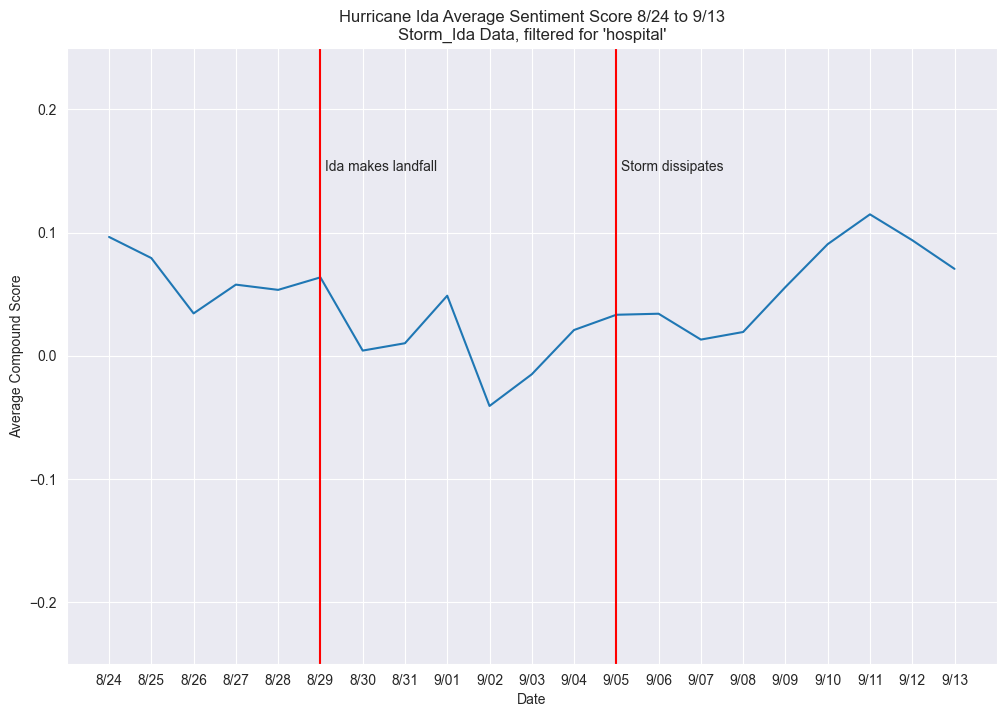

In [124]:
plt.figure(figsize=(12,8))
plt.plot(avg_sentiment)
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.xticks(np.arange(0, len(hospital_sentiment)), formatted_dates)
plt.ylim([-.25, .25])
plt.axvline(x=5, color='red')
plt.text(5.1,0.15,'Ida makes landfall')
plt.axvline(x=12, color='red')
plt.text(12.1,0.15,'Storm dissipates')
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.title('Hurricane Ida Average Sentiment Score 8/24 to 9/13\nStorm_Ida Data, filtered for \'hospital\'')
plt.show()

## Keyword Frequencies

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

keywords = {'hospital':[], 'evacuate':[], 'closed':[], 'full':[], 'flood':[], 'victim':[]}
hospital_status = pd.DataFrame()

while start_date <= end_date:
    print(start_date)
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df['text'] = [remove_urls(text).lower() for text in df['text']]
    df = df.drop_duplicates(subset=['text']).reset_index(drop=True)

    for hour in range(24):
        df_sub = df[df['time'].str[11:13] == str(hour).zfill(2)]
        if len(df_sub['text']) > 0:
            for word in keywords:
                count = 0
                for sentence in df_sub['text']:
                    if word in sentence:
                        count += 1
                keywords[word].append(count)
        else:
            for word in keywords:
                keywords[word].append(0)

    start_date += delta

# print(keywords)

In [22]:
keywords = {'hospital': [2, 2, 3, 0, 3, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 3, 0, 5, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 4, 1, 2, 1, 1, 4, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 6, 4, 8, 4, 4, 5, 4, 3, 2, 8, 7, 3, 6, 5, 2, 2, 1, 1, 1, 1, 0, 1, 4, 4, 12, 20, 14, 12, 23, 20, 17, 19, 40, 36, 31, 28, 23, 49, 34, 38, 20, 10, 7, 5, 3, 5, 17, 32, 31, 44, 38, 50, 41, 37, 35, 45, 52, 43, 60, 41, 36, 24, 36, 18, 30, 12, 21, 22, 15, 12, 34, 65, 92, 121, 87, 88, 74, 55, 62, 75, 92, 93, 69, 67, 89, 82, 63, 51, 42, 35, 24, 14, 21, 17, 35, 37, 47, 42, 40, 35, 73, 37, 25, 45, 41, 31, 17, 23, 17, 30, 18, 14, 11, 7, 6, 7, 7, 10, 13, 12, 38, 20, 8, 11, 15, 14, 15, 14, 10, 17, 17, 11, 7, 9, 5, 7, 2, 1, 3, 2, 3, 3, 2, 10, 13, 13, 7, 6, 12, 11, 9, 9, 7, 6, 5, 4, 7, 3, 3, 4, 6, 3, 4, 3, 3, 2, 5, 3, 9, 8, 8, 8, 7, 10, 3, 7, 5, 6, 11, 2, 7, 5, 2, 2, 3, 0, 3, 0, 7, 5, 2, 3, 2, 3, 5, 5, 4, 5, 6, 7, 1, 3, 3, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 3, 0, 1, 2, 4, 3, 2, 3, 4, 5, 2, 4, 1, 0, 1, 3, 0, 1, 3, 0, 0, 0, 1, 2, 1, 2, 2, 3, 4, 1, 3, 2, 1, 2, 1, 3, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 4, 3, 2, 1, 2, 1, 0, 2, 1, 3, 3, 0, 0, 1, 0, 2, 0, 1, 1, 2, 6, 8, 2, 2, 4, 6, 0, 0, 5, 3, 1, 3, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 4, 2, 1, 2, 2, 5, 3, 6, 3, 3, 3, 4, 0, 3, 1, 0, 1, 3, 0, 1, 2, 2, 1, 2, 5, 1, 4, 3, 5, 3, 2, 4, 2, 0, 1, 4, 1, 3, 0, 0, 1, 0, 1, 2, 4, 0, 2, 3, 1, 0, 2, 5, 4, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 4, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 4, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 2, 4, 1, 1, 1, 1, 0, 5, 1, 3, 2, 1, 1], 'evacuate': [3, 5, 2, 1, 1, 0, 0, 2, 1, 0, 3, 1, 4, 3, 1, 7, 4, 5, 2, 6, 4, 3, 3, 2, 2, 7, 4, 2, 0, 1, 2, 1, 0, 0, 0, 3, 7, 7, 4, 4, 8, 4, 5, 8, 4, 5, 5, 2, 6, 5, 6, 4, 1, 2, 1, 2, 2, 2, 2, 5, 4, 12, 7, 17, 3, 8, 12, 9, 10, 12, 10, 11, 11, 7, 6, 12, 1, 5, 2, 3, 2, 5, 4, 14, 17, 19, 18, 32, 36, 73, 70, 53, 63, 115, 89, 101, 57, 85, 86, 62, 62, 36, 33, 27, 13, 11, 21, 38, 63, 84, 80, 72, 86, 100, 97, 93, 108, 85, 85, 96, 77, 64, 90, 79, 53, 41, 37, 39, 24, 28, 43, 94, 125, 165, 150, 147, 157, 129, 141, 111, 92, 73, 62, 74, 62, 72, 81, 90, 72, 63, 41, 23, 19, 20, 29, 39, 61, 62, 64, 68, 66, 59, 48, 57, 50, 47, 63, 46, 39, 40, 46, 30, 17, 9, 11, 10, 10, 6, 9, 18, 22, 33, 25, 28, 30, 22, 21, 37, 31, 25, 24, 24, 23, 19, 15, 12, 10, 9, 3, 10, 4, 3, 6, 7, 11, 29, 23, 31, 21, 27, 14, 26, 22, 13, 15, 17, 15, 13, 17, 16, 8, 6, 6, 6, 2, 2, 6, 8, 10, 14, 19, 25, 38, 21, 30, 22, 21, 21, 22, 23, 19, 18, 14, 10, 8, 8, 4, 7, 4, 6, 5, 10, 10, 11, 8, 8, 13, 15, 10, 18, 18, 21, 17, 16, 9, 12, 6, 2, 2, 3, 6, 7, 5, 3, 2, 3, 4, 9, 8, 18, 7, 9, 8, 9, 12, 6, 10, 10, 12, 10, 7, 19, 8, 6, 0, 2, 0, 1, 0, 5, 4, 4, 8, 8, 5, 3, 6, 7, 7, 1, 6, 5, 3, 5, 4, 4, 4, 1, 1, 0, 2, 1, 2, 4, 6, 6, 3, 12, 10, 6, 8, 4, 5, 5, 7, 9, 3, 1, 2, 1, 3, 2, 0, 3, 1, 4, 1, 1, 9, 17, 12, 3, 7, 10, 10, 7, 13, 25, 9, 7, 2, 8, 9, 9, 4, 3, 3, 4, 1, 3, 3, 5, 9, 5, 12, 9, 17, 6, 4, 7, 5, 6, 4, 13, 11, 9, 7, 10, 2, 3, 2, 5, 2, 1, 3, 0, 4, 11, 6, 10, 5, 4, 2, 6, 5, 6, 6, 3, 5, 2, 1, 4, 2, 1, 0, 0, 1, 0, 0, 1, 7, 3, 9, 2, 7, 2, 9, 5, 6, 3, 7, 2, 2, 2, 1, 2, 3, 2, 1, 2, 3, 1, 0, 1, 3, 2, 0, 1, 5, 2, 2, 1, 0, 0, 0, 1, 3, 0, 1, 1, 3, 1, 3, 4, 1, 0, 2, 2, 4, 2, 0, 1, 4, 5, 2, 7, 0, 2, 3, 2, 0, 2, 3, 3, 2, 0, 3, 1, 0, 0, 0, 1, 1, 5, 4, 5, 4, 2, 2, 5, 3, 4, 4, 4], 'closed': [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 3, 11, 18, 30, 31, 39, 19, 21, 15, 9, 9, 5, 1, 2, 3, 2, 3, 0, 1, 1, 0, 4, 3, 10, 11, 16, 18, 5, 16, 29, 15, 21, 27, 13, 8, 17, 5, 8, 4, 3, 3, 3, 4, 2, 4, 3, 10, 11, 24, 24, 23, 26, 24, 30, 25, 30, 28, 33, 24, 24, 14, 10, 5, 2, 5, 4, 3, 1, 4, 14, 18, 21, 13, 25, 13, 15, 18, 16, 23, 12, 21, 9, 7, 5, 8, 4, 1, 2, 1, 4, 2, 2, 2, 5, 11, 13, 16, 13, 12, 5, 15, 15, 9, 12, 20, 13, 10, 7, 1, 3, 4, 0, 2, 1, 1, 5, 7, 10, 8, 12, 14, 12, 10, 11, 9, 10, 10, 8, 9, 6, 9, 12, 5, 9, 6, 3, 2, 2, 0, 6, 14, 23, 28, 27, 19, 18, 17, 12, 6, 13, 16, 8, 8, 5, 8, 6, 7, 4, 1, 2, 0, 1, 1, 4, 1, 3, 8, 5, 13, 16, 3, 9, 9, 8, 3, 4, 3, 5, 2, 3, 2, 1, 1, 3, 0, 1, 0, 0, 2, 2, 3, 2, 2, 1, 4, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 7, 0, 2, 3, 1, 1, 0, 3, 6, 6, 6, 2, 0, 1, 4, 3, 2, 8, 3, 4, 0, 4, 1, 1, 1, 3, 1, 1, 0, 1, 0, 3, 5, 4, 5, 1, 5, 0, 7, 1, 2, 4, 0, 3, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 2, 5, 2, 4, 5, 3, 3, 4, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 7, 1, 4, 2, 3, 5, 7, 4, 2, 1, 3, 3, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 3, 1, 1, 1, 2, 1, 3, 3, 0, 1, 5, 3, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 3, 8, 5, 4, 3, 2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 4, 3, 5, 3, 2, 4, 6, 3, 3, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 5, 4, 6, 1, 1, 2, 1, 0, 4, 2, 1, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 4, 2, 5, 2, 2, 5, 6, 2, 5, 4], 'full': [3, 3, 4, 2, 1, 2, 0, 1, 0, 2, 2, 5, 3, 5, 5, 6, 4, 7, 4, 3, 2, 3, 3, 4, 5, 4, 8, 7, 3, 0, 1, 2, 0, 2, 6, 4, 4, 7, 5, 9, 13, 8, 11, 6, 3, 7, 4, 3, 2, 2, 5, 0, 2, 1, 0, 0, 2, 2, 4, 4, 7, 10, 13, 9, 10, 6, 13, 10, 13, 27, 11, 10, 7, 6, 12, 16, 9, 3, 3, 6, 2, 7, 4, 11, 20, 22, 30, 32, 27, 46, 39, 33, 32, 63, 49, 23, 25, 29, 33, 31, 21, 17, 7, 13, 6, 8, 2, 14, 25, 38, 29, 27, 39, 43, 40, 43, 58, 45, 49, 41, 48, 37, 33, 42, 17, 35, 19, 19, 21, 16, 20, 30, 57, 69, 103, 91, 75, 73, 80, 74, 92, 81, 82, 65, 54, 73, 47, 55, 49, 26, 26, 23, 13, 14, 22, 32, 43, 51, 43, 57, 54, 49, 50, 42, 29, 48, 33, 42, 30, 25, 34, 25, 13, 9, 1, 11, 7, 7, 7, 14, 27, 26, 19, 25, 32, 27, 27, 29, 26, 30, 34, 31, 20, 20, 16, 16, 9, 5, 4, 2, 0, 9, 11, 10, 18, 14, 19, 29, 23, 21, 23, 22, 17, 18, 23, 34, 19, 23, 29, 54, 31, 16, 8, 6, 8, 8, 13, 13, 26, 28, 45, 41, 40, 24, 37, 21, 33, 25, 27, 17, 12, 16, 13, 16, 17, 3, 6, 3, 7, 8, 2, 7, 19, 22, 14, 24, 27, 18, 26, 19, 13, 27, 16, 11, 7, 8, 7, 12, 8, 5, 3, 2, 1, 7, 7, 4, 7, 13, 14, 11, 17, 17, 12, 13, 14, 16, 19, 10, 9, 4, 10, 7, 4, 8, 1, 3, 2, 2, 4, 9, 12, 8, 5, 18, 12, 11, 8, 14, 10, 9, 9, 6, 11, 11, 6, 3, 5, 7, 2, 4, 7, 5, 2, 4, 5, 5, 14, 9, 8, 9, 14, 5, 12, 12, 8, 16, 9, 9, 5, 7, 5, 3, 1, 5, 2, 5, 3, 3, 10, 12, 10, 11, 16, 12, 16, 12, 10, 10, 3, 17, 8, 6, 10, 13, 6, 6, 5, 5, 2, 5, 5, 14, 7, 8, 10, 11, 18, 10, 5, 10, 10, 21, 8, 12, 9, 10, 2, 7, 2, 3, 2, 5, 1, 4, 3, 5, 6, 7, 11, 8, 10, 18, 16, 10, 10, 7, 10, 10, 7, 9, 5, 6, 2, 3, 4, 2, 1, 6, 4, 8, 4, 13, 11, 3, 16, 6, 12, 7, 14, 8, 6, 3, 4, 6, 7, 6, 6, 5, 1, 3, 5, 3, 5, 4, 9, 9, 12, 10, 10, 10, 7, 6, 3, 6, 6, 5, 3, 3, 1, 4, 4, 2, 0, 0, 2, 2, 2, 6, 3, 7, 4, 10, 3, 1, 10, 2, 7, 7, 11, 10, 5, 8, 4, 4, 5, 2, 2, 1, 2, 2, 4, 6, 3, 9, 12, 13, 7, 11, 6, 9, 16, 10, 11, 12], 'flood': [5, 14, 16, 5, 2, 5, 2, 5, 5, 2, 4, 6, 8, 13, 7, 18, 4, 9, 11, 5, 5, 4, 4, 6, 3, 5, 12, 4, 1, 2, 1, 2, 1, 2, 6, 6, 10, 8, 7, 5, 8, 15, 14, 10, 9, 11, 4, 7, 14, 9, 2, 5, 2, 3, 0, 7, 0, 1, 4, 7, 10, 14, 7, 17, 13, 11, 13, 16, 13, 20, 10, 10, 8, 12, 13, 27, 9, 6, 3, 5, 0, 5, 12, 15, 18, 32, 29, 46, 28, 42, 53, 39, 41, 74, 48, 37, 32, 27, 22, 29, 17, 17, 7, 15, 7, 13, 17, 26, 39, 51, 55, 62, 43, 46, 42, 51, 58, 67, 59, 69, 64, 37, 55, 59, 24, 34, 37, 42, 22, 49, 44, 56, 96, 103, 117, 136, 123, 152, 137, 98, 130, 154, 155, 123, 135, 128, 185, 157, 113, 93, 69, 83, 50, 117, 114, 151, 177, 155, 202, 179, 141, 139, 146, 161, 117, 120, 116, 94, 87, 72, 76, 69, 57, 47, 35, 49, 41, 54, 66, 75, 111, 102, 121, 127, 128, 116, 91, 91, 109, 125, 107, 109, 60, 60, 47, 35, 40, 35, 29, 35, 30, 35, 68, 62, 86, 89, 103, 101, 110, 81, 88, 91, 80, 83, 92, 107, 233, 168, 355, 539, 434, 278, 207, 212, 182, 204, 265, 342, 424, 461, 538, 520, 545, 449, 379, 342, 315, 313, 290, 242, 204, 186, 166, 170, 136, 115, 82, 124, 87, 90, 96, 136, 153, 170, 161, 187, 166, 155, 141, 144, 94, 110, 94, 84, 72, 52, 50, 42, 45, 36, 22, 42, 27, 19, 31, 44, 37, 53, 58, 61, 72, 64, 45, 55, 46, 55, 56, 43, 24, 26, 25, 19, 17, 19, 15, 18, 13, 15, 22, 22, 22, 39, 38, 44, 40, 38, 58, 31, 35, 34, 35, 33, 29, 27, 19, 20, 19, 9, 12, 17, 14, 18, 19, 27, 30, 26, 41, 44, 33, 36, 43, 57, 41, 30, 32, 38, 18, 29, 24, 20, 10, 10, 9, 16, 12, 10, 13, 39, 43, 39, 53, 53, 56, 40, 60, 50, 50, 51, 46, 36, 33, 39, 22, 17, 21, 13, 8, 15, 9, 9, 10, 19, 27, 29, 45, 39, 56, 42, 28, 26, 27, 42, 28, 19, 15, 26, 16, 13, 13, 11, 6, 6, 6, 10, 7, 16, 20, 23, 30, 28, 26, 23, 19, 29, 17, 24, 7, 20, 18, 14, 8, 7, 7, 5, 8, 7, 6, 5, 8, 12, 20, 27, 15, 24, 23, 27, 28, 22, 17, 19, 9, 8, 8, 10, 9, 1, 9, 6, 5, 5, 4, 6, 8, 4, 9, 8, 11, 4, 13, 20, 11, 9, 13, 6, 10, 11, 9, 3, 2, 5, 7, 3, 1, 4, 2, 5, 3, 4, 9, 9, 11, 19, 19, 20, 23, 27, 22, 23, 32, 43, 16, 22, 11, 13, 13, 11, 8, 5, 6, 11, 14, 20, 38, 47, 34, 47, 32, 39, 39, 34, 43, 47, 34, 19], 'victim': [4, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 4, 3, 0, 2, 1, 2, 3, 0, 1, 4, 0, 4, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 4, 2, 2, 0, 2, 3, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 3, 2, 1, 3, 4, 4, 1, 0, 0, 3, 0, 0, 2, 1, 0, 1, 1, 2, 0, 3, 2, 1, 3, 4, 7, 1, 1, 2, 3, 8, 4, 3, 5, 7, 0, 2, 1, 0, 0, 0, 1, 5, 7, 2, 3, 13, 3, 3, 5, 10, 3, 2, 11, 4, 8, 8, 4, 9, 3, 3, 4, 2, 2, 5, 9, 21, 14, 27, 16, 20, 23, 10, 22, 31, 33, 22, 26, 18, 24, 32, 29, 24, 20, 12, 20, 13, 6, 17, 31, 38, 38, 47, 52, 53, 54, 59, 50, 41, 39, 47, 35, 29, 33, 23, 25, 14, 7, 7, 7, 11, 6, 14, 22, 25, 31, 31, 35, 37, 44, 40, 39, 37, 31, 35, 32, 15, 26, 21, 18, 12, 6, 8, 6, 2, 12, 5, 10, 22, 27, 33, 28, 20, 32, 36, 34, 21, 16, 23, 15, 16, 18, 14, 18, 7, 7, 2, 3, 6, 4, 8, 13, 25, 26, 33, 34, 47, 42, 35, 23, 37, 24, 25, 25, 17, 14, 27, 22, 6, 8, 8, 10, 10, 10, 6, 20, 22, 21, 26, 28, 37, 37, 25, 27, 42, 49, 39, 29, 22, 20, 16, 11, 6, 7, 6, 9, 5, 3, 9, 7, 15, 18, 15, 18, 14, 17, 8, 13, 18, 15, 8, 7, 14, 6, 10, 13, 3, 2, 2, 8, 6, 6, 8, 1, 24, 17, 25, 23, 26, 17, 32, 23, 19, 18, 13, 14, 9, 14, 9, 7, 8, 1, 6, 8, 3, 5, 6, 4, 10, 17, 15, 12, 17, 16, 14, 14, 14, 9, 12, 10, 7, 5, 2, 4, 2, 4, 1, 6, 3, 3, 4, 6, 13, 8, 7, 20, 22, 13, 25, 31, 21, 21, 16, 15, 8, 10, 7, 8, 6, 6, 1, 3, 4, 3, 3, 7, 5, 9, 8, 14, 15, 11, 10, 18, 13, 15, 16, 12, 12, 4, 11, 3, 4, 6, 0, 2, 0, 3, 4, 4, 8, 17, 14, 15, 12, 10, 16, 15, 19, 8, 12, 9, 6, 11, 5, 2, 5, 3, 1, 3, 3, 6, 5, 3, 7, 24, 26, 21, 13, 17, 12, 9, 13, 14, 5, 7, 7, 10, 2, 4, 2, 2, 1, 2, 0, 2, 0, 2, 2, 3, 4, 10, 9, 11, 3, 6, 4, 6, 10, 4, 6, 4, 5, 2, 0, 1, 1, 2, 3, 0, 0, 0, 4, 2, 1, 3, 4, 5, 4, 7, 5, 5, 7, 2, 2, 6, 1, 4, 4, 1, 1, 3, 0, 1, 1, 2, 1, 5, 6, 9, 11, 2, 11, 7, 9, 6, 12, 4]}


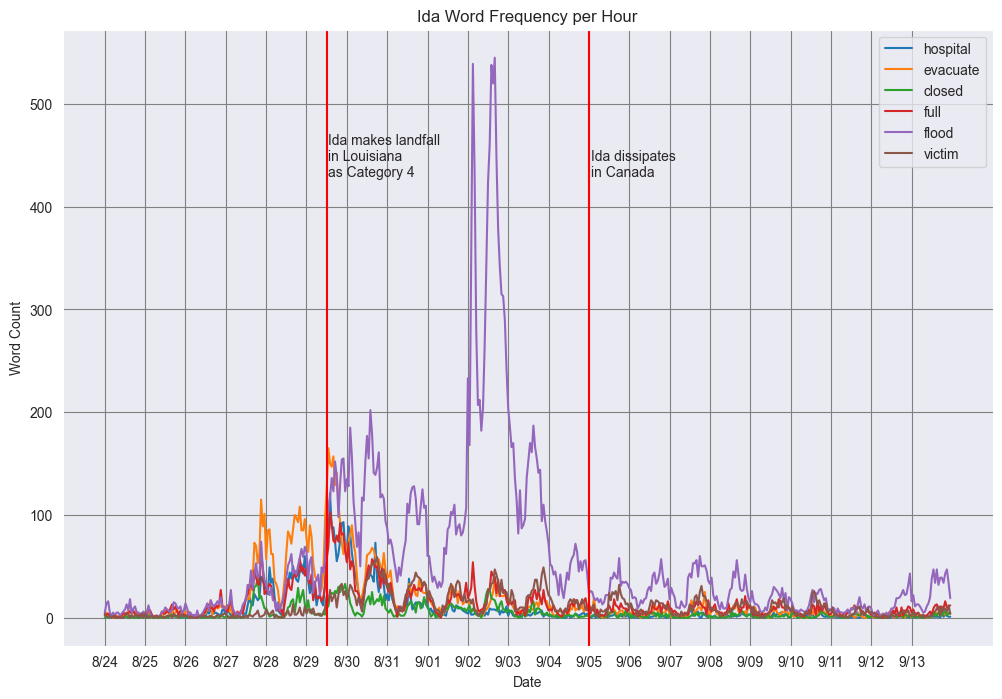

In [23]:
dates = pd.date_range(start='08/24/2021', end='09/13/2021')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(12,8))
plt.xticks(np.arange(0, len(keywords['hospital']), 24), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Ida Word Frequency per Hour')

for word in keywords:
    plt.plot(keywords[word])

bottom, top = plt.ylim()
landfall = len(dates) - 15.5
plt.axvline(x=24*landfall, color='red')
plt.text(24*landfall+1, top*.75, 'Ida makes landfall\nin Louisiana\nas Category 4')
dissipation = len(dates) - 9
plt.axvline(x=24*dissipation, color='red')
plt.text(24*dissipation+1, top*.75, 'Ida dissipates\nin Canada')

plt.legend(keywords.keys())
plt.grid(color='gray')
plt.savefig('text data/Ida/word_frequency_ida.png')
plt.show()

# User Analysis

Extract unique tweets about hospital status.

In [ ]:
start_date = datetime.date(2021, 8, 24)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

# keywords = ['shut', 'down', 'capacity', 'full', 'limit', 'out']
# keywords = {'hospital':[], 'evacuate':[], 'clos':[], 'full':[], 'flood':[], 'victim':[]}
select_users = pd.DataFrame()

while start_date <= end_date:
    print(start_date)
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\hurricane_" + str(start_date) + ".csv")
    if start_date >= datetime.date(2021, 8, 26):
        df2 = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")
        df = pd.concat([df, df2])
    df = df.drop(df.columns[0], axis=1)
    df = df[~df['text'].str.startswith("RT @", na=False)].reset_index(drop=True)
    df['text'] = [remove_urls(text).lower() for text in df['text']]
    df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
    indices = []

    for i in range(len(df['text'])):
        tweet = df['text'][i].lower()
        if 'hospital' in tweet:
            indices.append(i)
        # for word in keywords.keys():
        #     if word in tweet:
        #         # select_users.append((df['user'][i], df['description'][i], df['location'][i], df['followers'][i], df['text'][i], df['time'][i]))
        #         indices.append(i)
        #         break

    select_users = pd.concat([select_users, df.loc[indices]])

    start_date += delta

In [5]:
# select_users = pd.DataFrame(select_users, columns=['username', 'biography', 'location', 'followers', 'tweet', 'time'])
select_users = select_users.reset_index(drop=True)
print(len(select_users))
select_users.head()

4524


,user,description,verified,location,followers,time,id,text,retweet,reply,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,StarAdvertiser,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AHappyMargarita,Sometimes Sweet🍓Sometimes Salty🧂How You Come A...,False,NaN,513,Tue Aug 24 22:46:18 +0000 2021,1.430300e+18,@extremearturo @dramosgutierrez @latinorebels ...,0,ExtremeArturo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,capitalism_end,"FB: End Stage Capitalism, Millennials for Guil...",False,United States,472,Tue Aug 24 22:26:52 +0000 2021,1.430296e+18,fall/winter will likely be disastrous. dependi...,0,capitalism_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WKDZ,"Breaking news, weather, and sports for western...",True,"Cadiz, Kentucky",4203,Tue Aug 24 21:50:43 +0000 2021,1.430286e+18,a wreck on hurricane road near kentucky 274 in...,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0ct0n0n,I'm either the best thing you've ever seen or ...,False,NaN,2579,Tue Aug 24 19:06:29 +0000 2021,1.430245e+18,hospitals are full. covid is spreading faster ...,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# select_users2 = select_users.drop_duplicates(subset='user').reset_index(drop=True)
select_users2 = select_users.copy()
select_users2.dropna(subset=['location'], inplace=True)
print(len(select_users2))
select_users2 = select_users2[select_users2['location'].str.contains(',')].reset_index(drop=True)
select_users2 = select_users2[~select_users2['location'].str.contains('[0-9]|!|/|-')].reset_index(drop=True)
select_users2 = select_users2[~select_users2['location'].str.contains('\(|\)|&|→')].reset_index(drop=True)
select_users2 = select_users2[select_users2['location'].str.contains('[A-Z]{2}$')].reset_index(drop=True)
print(len(select_users2))
select_users2.head()

3473
1473


,user,description,verified,location,followers,time,id,text,retweet,reply,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,StarAdvertiser,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,greengrandma5,"Math is my gig. I'm 65, still learning. Pic is...",False,"Philadelphia, PA",941,Tue Aug 24 15:49:53 +0000 2021,1.430196e+18,"@jrubinblogger haiti has had double disasters,...",0,JRubinBlogger,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,alexa_carias,🇭🇳|| tpwk||⚖️||she/her||,False,"North Carolina, USA",162,Tue Aug 24 12:09:07 +0000 2021,1.430140e+18,+ imagine being sent to the hospital because y...,0,alexa_carias,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,precherzkid5050,"Retired X-ray Tech, Retired Medical Coder. Non...",False,"California, USA",47,Tue Aug 24 02:21:45 +0000 2021,1.429992e+18,@rodneyc18186863 @mismelissamarie these are th...,0,RodneyC18186863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LauraMiers,Pro-Kindness/Compassion/Love. Wealth inequalit...,False,"New York, USA",17210,Wed Aug 25 20:58:07 +0000 2021,1.430636e+18,houston: “hospitals are reaching a breaking po...,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add lat/lon coordinates to locations listed in bio

In [55]:
sub = select_users2.drop_duplicates(subset='location').reset_index(drop=True)
print(len(sub))
sub.head()

474


,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,775,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8072,greengrandma5,"Math is my gig. I'm 65, still learning. Pic is...",False,"Philadelphia, PA",941,Tue Aug 24 15:49:53 +0000 2021,1.430196e+18,"@jrubinblogger haiti has had double disasters,...",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11316,alexa_carias,🇭🇳|| tpwk||⚖️||she/her||,False,"North Carolina, USA",162,Tue Aug 24 12:09:07 +0000 2021,1.430140e+18,+ imagine being sent to the hospital because y...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15273,precherzkid5050,"Retired X-ray Tech, Retired Medical Coder. Non...",False,"California, USA",47,Tue Aug 24 02:21:45 +0000 2021,1.429992e+18,@rodneyc18186863 @mismelissamarie these are th...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2310,LauraMiers,Pro-Kindness/Compassion/Love. Wealth inequalit...,False,"New York, USA",17210,Wed Aug 25 20:58:07 +0000 2021,1.430636e+18,houston: “hospitals are reaching a breaking po...,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
locations = sub['location']
locations.head()

0            Hawaii, USA
1       Philadelphia, PA
2    North Carolina, USA
3        California, USA
4          New York, USA
Name: location, dtype: object

Get lat/lon coordinates from text

In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

# accepted = ['New York', 'New York City', 'Milwaukee', 'Seattle', 'Boston']

def get_city(name):
    if ',' in name:
        return name[:name.index(',')]
    # elif name in accepted:
    #     return name
    else:
        return ''

def findGeocode(place):
    try:
        geolocator = Nominatim(user_agent="your_app_name")
        return geolocator.geocode(place)
    except GeocoderTimedOut:
        return findGeocode(i)

# longitude = []
# latitude = []
coordinates = {}
cities = locations
cities = cities.apply(lambda x: get_city(str(x)))

# start at index 319
count = 0
for i in cities[count:]:
    if count == 166:
        break
    print(count)
    if findGeocode(i) is not None:
        loc = findGeocode(i)
        coordinates[i] = (loc.latitude, loc.longitude)
        # latitude.append(loc.latitude)
        # longitude.append(loc.longitude)
    else:
        coordinates[i] = np.nan
        # latitude.append(np.nan)
        # longitude.append(np.nan)
    count += 1

# select_users2['lat'] = latitude
# select_users2['lon'] = longitude
# select_users2
print(coordinates)

In [2]:
nan = np.nan
coordinates = {'Austin': (30.2711286, -97.7436995), 'Valley Forge': (40.0970507, -75.4696358), 'Brick': (52.443165, -9.6326147), 'Harrison Township': (39.262525600000004, -84.84310811722057), 'Dallas': (32.7762719, -96.7968559), 'Green Bay': (44.5126379, -88.0125794), 'The South': (10.32129075, 123.87440934536784), 'Miami': (25.7741728, -80.19362), 'Twin Cities': (38.2910251, -121.31106), 'Tampa': (27.9477595, -82.458444), 'Houston': (29.7589382, -95.3676974), 'Brightwaters': (40.7209321, -73.2673399), 'Massachusetts': (42.3788774, -72.032366), 'St Petersburg': (27.7700475, -82.6359078), 'Tarpon Springs': (28.148082950000003, -82.74380159717906), 'New York': (40.7127281, -74.0060152), 'Shreveport': (32.5135356, -93.7477839), 'Oklahoma': (34.9550817, -97.2684063), 'Columbia': (4.099917, -72.9088133), 'Myrtle Beach': (33.6956461, -78.8900409), 'Fort Myers Beach': (26.4520248, -81.948145), 'Birmingham': (52.4796992, -1.9026911), 'Boston': (42.3554334, -71.060511), 'San Jose': (37.3361663, -121.890591), 'Chattanooga': (35.0457219, -85.3094883), 'North Florida': (26.2886951, -98.3175282), 'Arlington': (32.7355816, -97.1071186), 'Santa Barbara': (34.4221319, -119.702667), 'Hyattsville': (38.9529442, -76.9408647), 'Mount Carmel': (38.4108801, -87.7614174), 'Corpus Christi': (27.7635302, -97.4033191), 'Oklahoma City': (35.4729886, -97.5170536), 'LAGOS': (6.4550575, 3.3941795), 'Kirkland': (47.6765382, -122.2070775), 'Silver Spring': (38.9997621, -77.02403709829767), 'Skiatook': (36.3684245, -96.0013847), 'Beverly Hills': (34.0696501, -118.3963062), 'Missouri': (38.7604815, -92.5617875), 'n.w.': (-26.1347819, 25.6546729), 'Whidbey Island Washington': (48.15814255, -122.59742939440014), 'Bowling Green': (36.9903199, -86.4436018), 'Forgetaboutit': (33.1286408, -107.2548546), 'Washington': (38.8950368, -77.0365427), 'Portsmouth': (50.800031, -1.0906023), 'Shadow Mountains': nan, 'Phulbari': (25.5683044, 87.8823852), 'Florida': (27.7567667, -81.4639835), 'Lakewood': (39.7085736, -105.0846694), 'Tennessee': (35.7730076, -86.2820081), 'West Palm Beach': (26.715364, -80.0532942), 'Columbus': (39.9622601, -83.0007065), 'Middlebury': (44.007273600000005, -73.16330105415423), 'San Bruno': (37.6261715, -122.433243), 'Indio': (33.7192808, -116.2188054), 'Red City': (-27.81762775, 153.28849899744898), 'Cullman': (34.1335332, -86.8779268), 'Ventnor City': (39.3405045, -74.4773916), 'Conway': (35.2521996, -92.6888936), 'South Carolina & Oregon': (45.4787113, -122.6768531), 'Dearborn': (42.3222599, -83.1763145), 'South Jordan': (40.5584882, -111.9367107), 'Marfa': (30.3117621, -104.023146), 'Gretna': (29.9146493, -90.0539604), 'Collin County': (33.1609629, -96.6060984), 'Cincinnati': (39.1014537, -84.5124602), 'Rogers': (36.3781607, -95.6190889), 'Cesspool of Sin': nan, 'Madison': (43.074761, -89.3837613), 'Puerto Rico': (18.2247706, -66.4858295), 'Sioux Falls': (43.5488256, -96.7307737), 'Ithaca': (42.437417499999995, -76.54837235139263), 'Winter Springs': (28.6987064, -81.3054759), 'Detroit': (42.3315509, -83.0466403), 'NP': (28.1083929, 84.0917139), 'Lincoln': (40.8088861, -96.7077751), 'Concord': (43.207178, -71.537476), 'Fort Smith': (35.3784666, -94.3996456), 'Cambridge': (52.2055314, 0.1186637), 'Park Slope': (40.6701033, -73.9859723), 'Plano': (33.0136764, -96.6925096), 'Oak Park': (41.8878145, -87.7887615), 'Union': (37.4616454, -89.2504793), 'Monett Missouri': (36.9289518, -93.9277149), 'Kaplan': (30.0031884, -92.2860146), 'Aiken': (33.5723191, -81.6182086), 'Mammoth Lakes': (37.6432525, -118.9668509), 'State College': (40.7944504, -77.8616386), 'Saint Cloud': (48.8437412, 2.219344), 'Wyoming': (43.1700264, -107.568534), 'Salt Lake City': (40.7596198, -111.886797), 'College Station': (30.5955289, -96.3071042), 'Scottsdale': (33.4942189, -111.926018), 'North Dakota': (47.6201461, -100.540737), 'South Miami': (25.7076017, -80.2933846), 'Earth': (34.2331373, -102.4107493), 'Vancouver': (49.2608724, -123.113952), 'Port Arthur': (29.8988618, -93.9288723), 'Monroe': (38.2722313, -90.1792484), 'Maryland': (39.5162401, -76.9382069), 'Hartford': (41.764582, -72.6908547), 'Mesa': (33.4151005, -111.831455), 'St Paul': (44.9497487, -93.0931028), 'Norfolk': (52.666667, 1.0), 'Watertown': (42.3652226, -71.1843771), 'Mandeville': (49.2206407, 1.0116837), 'Rocky River': (41.4756031, -81.8393034), 'Lake Wylie': (35.1085916, -81.0424965), 'Franklin': (33.2002659, -95.2231752), 'Ogden': (41.2230048, -111.9738429), 'Mississippi Gulf Coast': (30.42927775, -89.05722064814566), 'Barrow': (33.9848611, -83.6996482), 'Alaska': (64.4459613, -149.680909), 'Santa Cruz': (28.469648, -16.2540884), 'Amherst': (42.3685658, -72.505714), 'Jenks': (36.0228734, -95.9683278), 'Miami Lakes': (25.9087056, -80.3086619), 'Coppell': (32.9552598, -97.0155703), 'Lehigh Valley': (40.5887558, -75.564283), 'Daytona Beach': (29.2108147, -81.0228331), 'Panama City': (30.1586518, -85.6602936), 'Gulfport': (30.3674198, -89.0928155), 'Lake Worth Beach': (26.6159698, -80.0569927), 'Tucson': (32.2228765, -110.9748477), 'Shrewsbury': (52.707755, -2.7540658), 'Shippensburg': (40.0507198, -77.5205485), 'Palm Beach': (26.6279798, -80.4494174), 'Apex': (35.7325352, -78.8505516), 'Rust belt': nan, 'Delaware': (38.6920451, -75.4013315), 'Little Rock': (34.7465071, -92.2896267), 'Carl Junction': (37.1767058, -94.5649938), 'Middlesex county': (42.485452, -71.3968261), 'Hokkaido': (43.4519831, 142.8197834), 'Lewisville': (33.046233, -96.994174), 'Philadelphia PA': (39.9527237, -75.1635262), 'Eau Claire': (44.811349, -91.4984941), 'Winchester': (51.0612766, -1.3131692), 'Palo Alto': (37.4443293, -122.1598465), 'Constantinopolis': (41.0091982, 28.9662187), 'Alexandria': (38.8051095, -77.0470229), 'Eugene': (44.0505054, -123.0950506), 'Oak Lawn': (41.7108662, -87.7581081), 'Valdosta': (30.8327022, -83.2784851), 'Austin or College Station': nan, 'Colorado Springs': (38.8339578, -104.825348), 'St. Louis': (38.6280278, -90.1910154), 'New Haven': (41.3082138, -72.9250518), 'Okmulgee': (35.6677078, -95.9690122), 'SF Bay': (37.8069936, -122.4064735), 'OKC': (35.3955479, -97.5962256), 'ABQ': (35.0841034, -106.650985), 'Syracuse': (43.0481221, -76.1474244), 'Eastern Oregon': (14.6132295, 121.1001333), 'Philadelphia': (39.9527237, -75.1635262), 'Dothan': (31.2237285, -85.3934375), 'Palm Springs': (33.772179449999996, -116.49529769683983), 'Alpharetta': (34.0709576, -84.2747329), 'Durham': (35.996653, -78.9018053), 'Bristol': (51.4538022, -2.5972985), 'Walkersville': (39.4817659, -77.3507698), 'Bradford': (53.7944229, -1.7519186), 'Rhode Island': (41.7962409, -71.5992372), 'Auburn': (32.6098566, -85.4807825), 'Lake Elsinore': (33.6680772, -117.3272615), 'Prince George': (37.1815024, -77.2153144), 'Mountain View': (37.3893889, -122.0832101), 'Newcastle': (54.9738474, -1.6131572), 'Long Beach': (33.7690164, -118.191604), 'New Orleans': (29.9759983, -90.0782127), 'Indiana': (40.3270127, -86.1746933), 'TX': (31.2638905, -98.5456116), 'Cape Coral': (26.6059432, -81.9806771), 'Marietta': (33.9528472, -84.5496148), 'Lake Oswego': (45.4206749, -122.670649), 'Hells Hollow': (36.1445, -113.110927), 'Jersey City': (40.7215682, -74.047455), 'Mooresville': (35.5848596, -80.8100724), 'Sarasota': (27.3365805, -82.5308545), 'Vernon': (49.0917814, 1.4886571), 'Yuma': (32.665135, -114.47603157249804), 'Fort Worth': (32.753177, -97.3327459), 'Beaumont': (30.0860459, -94.1018461), 'Sunny AZ': (33.420268899999996, -111.62671412409372), 'Baltimore': (39.2908816, -76.610759), 'East Contra Costa County': (37.944924, -122.3135811), 'Amarillo': (35.2072185, -101.833824), 'Tottenville Staten Island': (40.5127684, -74.2519703), 'SE houston': (40.2464593, -80.2114472), 'London': (51.5073359, -0.12765), 'Minnesota City': (44.0938521, -91.7495959), 'Brandon': (46.35270835, 4.577608667704116), 'Howell': (36.766989, -91.9151975), 'Gainesville': (29.6519684, -82.3249846), 'Roscoe': (32.441615, -100.539297), 'Johnson City': (36.3134398, -82.3534728), 'Oviedo': (43.3604218, -5.8450534), 'Pittsburgh': (40.4416941, -79.9900861), 'Youngstown': (41.1035786, -80.6520161), 'Rochester': (43.157285, -77.615214), 'Federal Way': (47.313494, -122.33931), 'Edwardsville': (38.8114364, -89.953157), 'Yadkinville': (36.1345807, -80.6595079), 'Memphis': (35.1460249, -90.0517638), 'Sunnyvale': (37.3688301, -122.036349), 'San Mateo': (37.496904, -122.3330573), 'Tulsa': (36.1563122, -95.9927516), 'Hilo': (19.7073734, -155.08158), 'Aurora': (41.7571701, -88.3147539), 'Clarksville': (36.5277607, -87.3588703), 'Bronx': (40.851039, -73.84025027765061), 'Hanover': (52.3744779, 9.7385532), 'Friendswood': (29.5293998, -95.2010447), 'Live Truck': (31.525938, -91.76799), 'Tyler': (32.3512601, -95.3010624), 'East Brooklyn': (41.7985088, -71.90113967087393), 'In my zone': (10.01026465, 76.28739732113138), 'Long Island': (40.85149705, -73.0994258107431), 'Pawtucket': (41.878711, -71.3825558), 'South Dakota': (44.6471761, -100.348761), 'United States': (39.7837304, -100.445882), 'Port Huron': (42.9815877, -82.440466), 'The Widening Gyre': nan, 'Lost Angeles': (34.4101325, -118.4407684), 'Coos Bay': (43.3678937, -124.2174647), 'Get my mail in Raleigh': nan, 'Manhattan': (40.7896239, -73.9598939), ' San Diego': (32.7174202, -117.1627728), 'Buffalo': (42.8867166, -78.8783922), 'Woodstock': (42.0410578, -74.1182492), 'Ashby': (46.093016, -95.81755), 'East Lansing': (42.7320307, -84.4721678), 'Mississippi State': (33.4549304, -88.7859584), 'Whidbey Island': (48.15814255, -122.59742939440014), 'Naperville': (41.7728699, -88.1479278), 'Coachella Valley': (33.7672351, -116.3560439), 'Fort Washington': (38.738019, -77.00207559994112), 'Palm Harbor': (28.0856815, -82.75690699742961), 'Brookhaven': (31.5790667, -90.4407122), 'Conyers': (33.6676103, -84.0176904), 'Edmonds': (47.8105738, -122.3774952), 'Wyncote': (40.0906988, -75.14588569222737), 'Simi Valley': (34.2677404, -118.7538071), '📍Minneapolis': (44.9772995, -93.2654692), 'Savannah': (32.0790074, -81.0921335), 'Parkland': (26.3100794, -80.23727), 'Beaverton': (45.4871723, -122.80378), 'Koasati Mvskoke lands': nan, 'Bay Village': (42.3492219, -71.0678965), 'Lynchburg': (37.4137536, -79.1422464), 'Asheville': (35.595076, -82.5528478), 'Mishawaka': (41.6611642, -86.1807031), 'Manchester': (53.4794892, -2.2451148), 'Padre Island': (26.8445017, -97.3677593), 'Queens': (40.7135078, -73.8283132), 'Wichita': (37.6922361, -97.3375448), 'Hawthorne': (33.9188589, -118.3483256), 'Laramie': (41.311367, -105.591101), 'Bedford': (40.0271453, -78.5237447), 'Springfield': (39.7990175, -89.6439575), 'East Hartford': (41.7823216, -72.6120346), 'Texarkana': (33.44667445, -94.07714830522015), 'Edmonton': (53.5462055, -113.491241), 'Raceland': (38.5399754, -82.7283275), 'Ypsilanti': (42.2410562, -83.613055), 'Fleet': (51.2828601, -0.8316334471979006), 'Ft. Lauderdale': (26.1223084, -80.1433786), 'Merced': (37.1641544, -120.7678602), 'Wenonah': (39.323392, -89.28872217620508), 'Jacksonville': (30.3321838, -81.655651), 'South Haven': (45.2922849, -94.2120667), 'Weat Union': nan, 'Terrytown': (29.9039461, -90.02892838083972), 'Santa Clara': (37.2333253, -121.6846349), 'Metairie': (29.9899926, -90.1505426), 'Herndon': (39.909726, -100.785153), 'Connecticut': (41.6500201, -72.7342163), 'Greensboro': (36.0726355, -79.7919754), 'IL': (40.0796606, -89.4337288), 'Half Moon Bay': (52.3472138, -114.1766304), 'McKinney': (33.1976496, -96.6154471), 'Akron': (41.083064, -81.518485), 'Covington': (39.0836224, -84.508371), 'Cresskill': (40.9414874, -73.9593041), 'Maui': (20.802956799999997, -156.31068331602177), 'the Sunny Side of Hell': nan, 'Virginia Beach': (36.8529841, -75.9774183), 'Bangor': (44.8036159, -68.7702127), 'Frederick': (39.2127031, -78.279166), 'HUMACAO': (18.1491849, -65.8250136), 'Riverview': (46.0612076, -64.8033246), 'El Dorado Hills': (38.67716825, -121.06431968581433), 'East Tennessee': (35.79958245, -84.10528221226122), 'Culloden': (57.4891455, -4.1348941), 'Charleston': (32.7884363, -79.9399309), 'Hackettstown': (40.8538944, -74.8291638), 'Washingduck': nan, 'Yardley': (40.245664, -74.8459972), 'Johnston': (35.5285816, -78.3768021), 'Rock Hill': (34.9248667, -81.0250784), 'Wake Forest': (35.9803138, -78.5103731), 'Hawaii': (19.593801499999998, -155.42837009716908), 'North Carolina': (35.6729639, -79.0392919), 'California': (36.7014631, -118.755997), 'Cheektowaga': (42.9033917, -78.7547536), 'Louisiana': (30.8703881, -92.007126), 'Honolulu': (21.304547, -157.855676), 'Baton Rouge': (30.4494155, -91.1869659), 'Denver': (39.7392364, -104.984862), 'Chicago': (41.8755616, -87.6244212), 'Hammond': (41.5833618, -87.5000081), 'Texas': (31.2638905, -98.5456116), 'Meridian': (32.3643098, -88.703656), 'Waterford Works': (39.7231721, -74.8490515), 'Albany': (41.000028, 19.9999619), 'Portland': (45.5202471, -122.674194), 'Ocala': (29.1871986, -82.1400923), 'Omaha': (41.2587459, -95.9383758), 'Spokane': (47.6571934, -117.42351), 'Los Angeles': (34.0536909, -118.242766), 'Knoxville': (35.9603948, -83.9210261), 'Worcester': (42.2625621, -71.8018877), 'Reno': (39.5261206, -119.8126581), 'New Hampshire': (43.4849133, -71.6553992), 'Pennsylvania': (40.9699889, -77.7278831), 'Tallahassee': (30.4380832, -84.2809332), 'Jackson': (32.2998686, -90.1830408), 'Cedar Creek': (41.0366655, -96.0994583), 'Charlottesville': (38.029306, -78.4766781), 'Minnesota': (45.9896587, -94.6113288), 'Palm Bay': (27.9946969, -80.6366144), 'Atlanta': (33.7489924, -84.3902644), 'Seattle': (47.6038321, -122.330062), 'Lansing': (42.7337712, -84.5553805), 'Oxford': (51.7520131, -1.2578499), 'San Marcos': (29.8826436, -97.9405828), 'Maryville': (38.7236594, -89.9559348), 'Kentucky': (37.5726028, -85.1551411), 'Mobile': (30.6913462, -88.0437509), 'Pontotoc': (34.2114655, -89.0382651), 'Tacoma': (47.2455013, -122.438329), 'Everett': (47.9793437, -122.2127011), 'New Jersey': (40.0757384, -74.4041622), 'Richmond': (37.5385087, -77.43428), 'Kansas City': (39.100105, -94.5781416), 'Boulder': (40.0149856, -105.270545), 'Naweleeans': nan, 'Las Vegas': (36.1672559, -115.148516), 'Iowa': (41.9216734, -93.3122705), 'Georgia': (32.3293809, -83.1137366), 'West Springfield': (42.105237, -72.6213712), 'Oakley': (37.9974219, -121.7124536), 'Hattiesburg': (31.3271189, -89.2903392), 'Milwaukee': (43.0349931, -87.922497), 'Santa Monica': (34.0194704, -118.491227), 'Boone': (42.321246, -88.8235511), 'Arizona': (34.395342, -111.763275), 'Norman': (35.2225717, -97.4394816), 'Kalamazoo': (42.291707, -85.5872286), 'Denton': (33.1838787, -97.1413417), 'Alabama': (33.2588817, -86.8295337), 'Berkeley': (37.8708393, -122.272863), 'Coconut Creek': (26.2517482, -80.1789351), 'Kansas': (38.27312, -98.5821872), 'Oregon': (43.9792797, -120.737257), 'Phoenix': (33.4484367, -112.074141), 'Rockville': (39.0817985, -77.1516844), 'Colorado': (38.7251776, -105.607716), 'San Tan Valley': (33.1775233, -111.547892), 'New Mexico': (34.5708167, -105.993007), 'Montana': (47.3752671, -109.638757), 'Ragley': (30.512699, -93.2323813), 'Walla Walla': (46.2055155, -118.5174284), 'Davis': (40.7474784, -92.3965311), 'West Coast': (-42.5638896, 171.45233400435404), 'Cos Cob': (41.0334305, -73.5995698), 'Lexington': (38.0464066, -84.4970393), 'Nashville': (36.1622767, -86.7742984), 'Virginia': (37.1232245, -78.4927721), 'Ann Arbor': (42.2681569, -83.7312291), 'South Tampa': (27.9520051, -82.3425239), 'Charlotte': (35.2272086, -80.8430827), 'Tempe': (33.4255117, -111.9400164), 'Space Coast': (-28.1677446, 153.5352458), 'Wilmington': (39.7459468, -75.546589), 'High Springs': (29.8268319, -82.5968583), 'Arkansas': (35.2048883, -92.4479108), 'Mississippi': (32.9715285, -89.7348497), 'San Francisco': (37.7790262, -122.419906), 'Wisconsin': (44.4308975, -89.6884637), 'Palm City': (27.1713925, -80.28422171034893), 'Orlando': (28.5421109, -81.3790304), 'St Louis': (38.6280278, -90.1910154), 'Biloxi': (30.4007626, -88.8893818), 'Ohio': (40.2253569, -82.6881395), 'Raleigh': (35.7803977, -78.6390989), 'Canton': (32.555664, -95.8640507), 'New Albany': (38.2856247, -85.8241312), 'Michigan': (43.6211955, -84.6824346), 'Idaho': (43.6447642, -114.015407), 'Left of You': (38.2005883, -111.4739989), 'Uvalde': (29.300357, -99.7733181), 'Lafayette': (30.2043259, -92.0298813), 'Tigard': (45.4307473, -122.771933), 'Redmond': (47.6694141, -122.1238767), 'Sacramento': (38.5810606, -121.493895), 'Albuquerque': (35.0841034, -106.650985), 'Florence': (43.7698712, 11.2555757), 'Fayetteville': (36.0625843, -94.1574328), 'San Diego': (32.7174202, -117.1627728), 'Staten Island': (40.5834557, -74.1496048), 'Chapel Hill': (35.9131542, -79.05578), 'Springdale': (36.1867442, -94.1288142), 'The good part of  Arizona': nan, 'Iowa City': (41.6612561, -91.5299106), 'Midwest': (43.411391, -106.280075), 'San Antonio': (29.4246002, -98.4951405), 'Henderson': (32.182598, -95.7893178), 'Wrentham': (42.0667652, -71.3281114), 'South Carolina': (33.6874388, -80.4363743), 'Calabasas': (34.1446643, -118.644097), 'Tuscaloosa': (33.2095614, -87.5675258), 'Cleveland': (41.4996574, -81.6936772), 'WV': (38.4758406, -80.8408415), 'Louisville': (38.2542376, -85.759407), 'Providence': (41.8239891, -71.4128343), 'Maine': (45.709097, -68.8590201), 'Santa Rosa': (38.4404925, -122.7141049), 'Munich': (48.1371079, 11.5753822), 'Lincoln Co': (35.4866424, -81.2062724), 'The Woodlands': (30.1734194, -95.504686), 'Montgomery': (32.3669656, -86.3006485), 'Kingsport': (36.550238, -82.5594293), 'Indianapolis': (39.7683331, -86.1583502), 'Brooklyn': (40.6526006, -73.9497211), 'Illinois': (40.0796606, -89.4337288), 'Bryans Road': (38.62537235, -77.08208250390275), 'Georgia mountains': (34.527972250000005, -83.97933180294237), 'Asbury Park': (40.2203907, -74.0120817), 'Fort Collins': (40.5508527, -105.0668085), 'Buckley': (40.5969794, -88.0380959), 'Sheridan': (39.3530598, -100.4576457), 'New Bern': (35.1084931, -77.0441143), 'Travelers Rest': (34.9676167, -82.4434548), 'SEATTLE': (47.6038321, -122.330062)}


In [7]:
lat = []
lon = []

def get_city(name):
    if ',' in name:
        return name[:name.index(',')]
    else:
        return ''

for loc in select_users2['location']:
    city = get_city(loc)
    if type(coordinates[city]) == tuple:
        lat.append(coordinates[str(city)][0])
        lon.append(coordinates[str(city)][1])
    else:
        lat.append(np.nan)
        lon.append(np.nan)
select_users2['lat'] = lat
select_users2['lon'] = lon
select_users2.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,...,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude,lat,lon
0,hicovidtrends,Hawaii COVID Trends is @hicovidtrends on Insta...,False,"Hawaii, USA",162,Tue Aug 24 22:58:29 +0000 2021,1.430304e+18,@staradvertiser @govhawaii so how did all thos...,0,StarAdvertiser,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.593801,-155.428370
1,greengrandma5,"Math is my gig. I'm 65, still learning. Pic is...",False,"Philadelphia, PA",941,Tue Aug 24 15:49:53 +0000 2021,1.430196e+18,"@jrubinblogger haiti has had double disasters,...",0,JRubinBlogger,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.952724,-75.163526
2,alexa_carias,🇭🇳|| tpwk||⚖️||she/her||,False,"North Carolina, USA",162,Tue Aug 24 12:09:07 +0000 2021,1.430140e+18,+ imagine being sent to the hospital because y...,0,alexa_carias,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.672964,-79.039292
3,precherzkid5050,"Retired X-ray Tech, Retired Medical Coder. Non...",False,"California, USA",47,Tue Aug 24 02:21:45 +0000 2021,1.429992e+18,@rodneyc18186863 @mismelissamarie these are th...,0,RodneyC18186863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.701463,-118.755997
4,LauraMiers,Pro-Kindness/Compassion/Love. Wealth inequalit...,False,"New York, USA",17210,Wed Aug 25 20:58:07 +0000 2021,1.430636e+18,houston: “hospitals are reaching a breaking po...,19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015


In [8]:
select_users2 = select_users2.dropna(subset='lat').reset_index(drop=True)
print(len(select_users2))

1461


In [9]:
sub = select_users2.copy()
sub = sub[sub['lon'] < -50]
sub = sub[sub['lon'] > -140]
sub = sub[sub['lat'] > 25].reset_index(drop=True)
print(len(sub))

1401


In [10]:
for i in range(len(sub)):
    if sub['verified'][i]:
        sub['verified'][i] = 'verified'
    else:
        sub['verified'][i] = 'unverified'

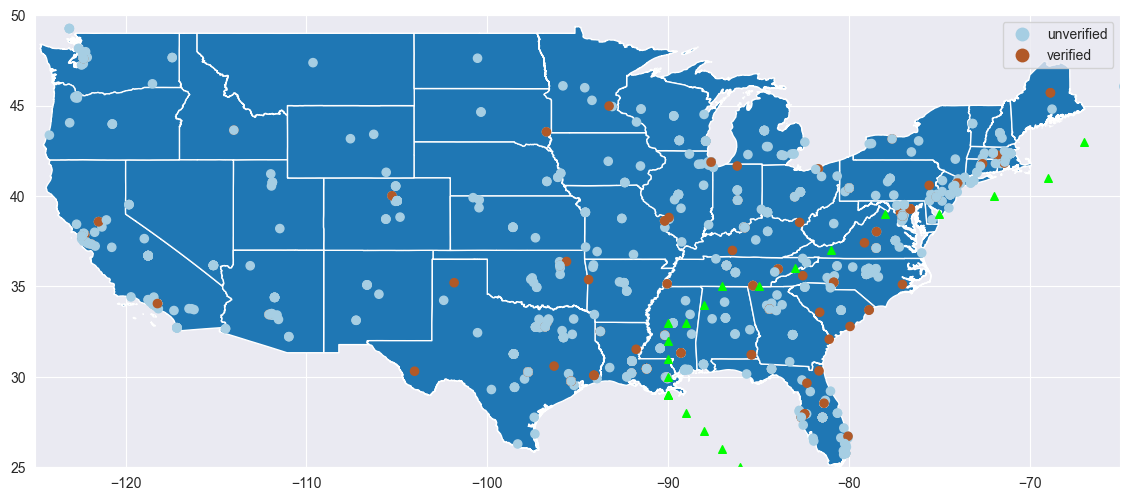

In [72]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(sub['lon'], sub['lat'])]
gdf = GeoDataFrame(sub, geometry=geometry)

ida_track = pd.read_csv('ida_track.csv')
ida_track['Lat'] = ida_track['Lat'].apply(lambda x: float(x[0:4]))
ida_track['Lon'] = ida_track['Lon'].apply(lambda x: -1 * float(x[0:4]))
geometry2 = [Point(xy) for xy in zip(ida_track['Lon'], ida_track['Lat'])]
ida_gdf = GeoDataFrame(ida_track, geometry=geometry2)

usa = gpd.read_file(r"C:\Users\xiaod\OneDrive\Desktop\Research\HurricaneProject\cb_2018_us_state_500k\cb_2018_us_state_500k.shp")
ax = usa.plot(figsize=(14,10))
# ax2 = gdf.plot(ax=ax, markersize=35, marker='o', label='pos')
ax2 = gdf.plot(ax=ax, column=sub['verified'], markersize=35, marker = 'o', label='pos', legend=True, cmap='Paired')
# for x, y, label, num in zip(sub['lon'], sub['lat'], sub['user'], sub['followers']):
#     if num > 10e5:
#         ax2.annotate(label, xy=(x, y), xytext=(-20, -10), textcoords="offset points")
ax3 = ida_gdf.plot(ax=ax, color='lime', markersize=30, marker='^', label='Ida Track')

ax.set_xlim(-125, -65)
ax.set_ylim(25, 50)

plt.savefig('user analysis/ida_hospital_users2')
plt.show()

In [75]:
sub.drop_duplicates(subset='user').sort_values(by='followers', ascending=False).head(n=10)

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude,lat,lon
817,88824,washingtonpost,Democracy Dies in Darkness.,verified,"Washington, DC",18207941,Mon Aug 30 18:04:27 +0000 2021,1.432404e+18,hospitals in southeast louisiana took a beatin...,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.895037,-77.036543
806,68488,NBCNews,"News updates from around the 🌎, all day, every...",verified,"New York, NY",8601401,Mon Aug 30 19:07:03 +0000 2021,1.432420e+18,images: hurricane ida made landfall sunday in ...,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
462,119046,CBSNews,Your source for original reporting and trusted...,verified,"New York, NY",8199587,Sun Aug 29 20:40:01 +0000 2021,1.432081e+18,tracking ida: louisiana hospitals brace for af...,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
863,157945,MarketWatch,"News, personal finance & commentary from Marke...",verified,"New York, NY",4069161,Mon Aug 30 14:31:22 +0000 2021,1.432350e+18,"louisiana’s hospitals, already packed with cov...",4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
298,116463,weatherchannel,The World's Leading Weather Provider. Home to ...,verified,"Atlanta, GA",3916961,Sat Aug 28 11:39:30 +0000 2021,1.431582e+18,"if you're just waking up, here's a quick #ida ...",628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.748992,-84.390264
588,349764,GMA,Put some GOOD in your morning! Watch @GMA at 7...,verified,"New York, NY",3733132,Sun Aug 29 15:12:03 +0000 2021,1.431998e+18,pushed to the brink: in what officials are cal...,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
418,57256,Newsweek,The freedom to disagree.,verified,"New York, NY",3444243,Sun Aug 29 22:18:09 +0000 2021,1.432105e+18,the dangerous cat 4 storm tore part of the roo...,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
427,73966,nypost,Breaking news & features from The New York Pos...,verified,"New York, NY",2263795,Sun Aug 29 21:49:20 +0000 2021,1.432098e+18,video captures moment ida rips roof off louisi...,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015
387,11615,RBReich,"Berkeley professor, former Secretary of Labor....",verified,"Berkeley, CA",1389311,Sun Aug 29 23:37:08 +0000 2021,1.432125e+18,hopes and prayers for the people of new orlean...,357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.870839,-122.272863
1090,9795,Nightline,@ABC News Nightline anchored by @JujuChangABC ...,verified,"New York, USA",1138763,Tue Aug 31 22:38:27 +0000 2021,1.432835e+18,hurricane ida and its subsequent destruction c...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712728,-74.006015


In [11]:
len(sub.drop_duplicates(subset='user')[sub['verified'] == 'verified'])

171

In [12]:
sub['time'] = pd.to_datetime(sub['time'])
verified = sub[sub['verified'] == 'verified'].reset_index(drop=True)
verified = verified[verified['time'] <= '2021-09-05 18:00:00+00:00']
verified = verified[verified['time'] >= '2021-08-26 12:00:00+00:00'].reset_index(drop=True)
verified.head()

,user,description,verified,location,followers,time,id,text,retweet,reply,...,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude,lat,lon
0,BRProudNews,We are Baton Rouge proud. Powered by WVLA NBC ...,verified,"Baton Rouge, LA",4502,2021-08-26 23:48:59+00:00,1.431041e+18,local hospitals prepare to balance covid-19 an...,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.449416,-91.186966
1,aliciavlozano,Native Angeleno covering CA & the West for @NB...,verified,"Los Angeles, CA",1743,2021-08-27 23:49:27+00:00,1.431404e+18,"new orleans hospitals, residents brace for per...",0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.053691,-118.242766
2,SteveHuff,"Deputy Digital Editor, @maximmag. Writer, jour...",verified,"Worcester, MA",11209,2021-08-27 23:32:32+00:00,1.431399e+18,between covid-19 denialism leading to damn nea...,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.262562,-71.801888
3,fineout,Reporter with POLITICO who also tweets and fun...,verified,"Tallahassee, FL",23562,2021-08-27 22:47:28+00:00,1.431388e+18,ap: officials decided against evacuating new o...,32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.438083,-84.280933
4,GanucheauAdam,Editor-in-chief @MSTodayNews.,verified,"Jackson, MS",9060,2021-08-27 22:34:08+00:00,1.431385e+18,"mississippi gulf coast hospitals, overrun with...",2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.299869,-90.183041


In [16]:
ida_track = pd.read_csv('ida_track.csv')
ida_track['Lat'] = ida_track['Lat'].apply(lambda x: float(x[0:4]))
ida_track['Lon'] = ida_track['Lon'].apply(lambda x: -1 * float(x[0:4]))
ida_track['Time'] = ida_track['Time'].astype(str).str.zfill(4)
ida_track['datetime'] = ida_track['Date'].astype(str) + ' ' + ida_track['Time'].astype(str)
ida_track['datetime'] = pd.to_datetime(ida_track['datetime'])
ida_track.head()

,Date,Time,,,Lat,Lon,Max Wind,Min Pressure,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Max Wind Radius,datetime
0,20210826,1200,,TD,16.0,-78.0,30,1006,0,0,...,0,0,0,0,0,0,0,0,60,2021-08-26 12:00:00
1,20210826,1800,,TS,17.0,-79.0,35,1006,60,0,...,0,0,0,0,0,0,0,0,50,2021-08-26 18:00:00
2,20210827,0000,,TS,18.0,-80.0,40,1004,60,0,...,0,0,0,0,0,0,0,0,50,2021-08-27 00:00:00
3,20210827,0600,,TS,19.0,-80.0,45,1002,70,0,...,0,0,0,0,0,0,0,0,40,2021-08-27 06:00:00
4,20210827,1200,,TS,20.0,-81.0,55,996,80,60,...,30,0,0,0,0,0,0,0,30,2021-08-27 12:00:00


In [17]:
import geopy.distance

distances = []
for i in range(len(verified)):
    track_sub = ida_track[ida_track['datetime'].astype(str) <= str(verified['time'][i])]
    c1 = (verified['lat'][i], verified['lon'][i])
    c2 = (track_sub['Lat'][len(track_sub) - 1], track_sub['Lon'][len(track_sub) - 1])
    distances.append(geopy.distance.geodesic(c1, c2).km)

In [ ]:
print(distances)

In [18]:
print(pd.Series(distances).describe())

count     211.000000
mean     1388.156579
std       870.962696
min        37.468540
25%       747.062411
50%      1206.138654
75%      1950.576200
max      4361.979679
dtype: float64


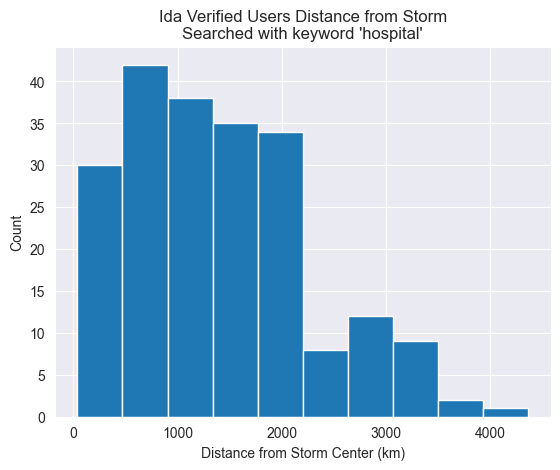

In [87]:
plt.hist(distances)
plt.title('Ida Verified Users Distance from Storm\nSearched with keyword \'hospital\'')
plt.xlabel('Distance from Storm Center (km)')
plt.ylabel('Count')
plt.savefig('user analysis/ida_hospital_verified2.png')
plt.show()

In [19]:
unverified = sub[sub['verified'] == 'unverified'].reset_index(drop=True)
unverified = unverified[unverified['time'] <= '2021-09-04 18:00:00+00:00']
unverified = unverified[unverified['time'] >= '2021-08-26 12:00:00+00:00'].reset_index(drop=True)
print(len(unverified.drop_duplicates(subset='user')))

895


In [20]:
distances2 = []
for i in range(len(unverified)):
    track_sub = ida_track[ida_track['datetime'].astype(str) <= str(unverified['time'][i])]
    c1 = (unverified['lat'][i], unverified['lon'][i])
    c2 = (track_sub['Lat'][len(track_sub) - 1], track_sub['Lon'][len(track_sub) - 1])
    distances2.append(geopy.distance.geodesic(c1, c2).km)

In [ ]:
print(distances2)

In [89]:
print(pd.Series(distances2).describe())

count    1095.000000
mean     1656.656187
std       964.597743
min         8.002603
25%       921.049183
50%      1470.359548
75%      2154.971449
max      5282.184661
dtype: float64


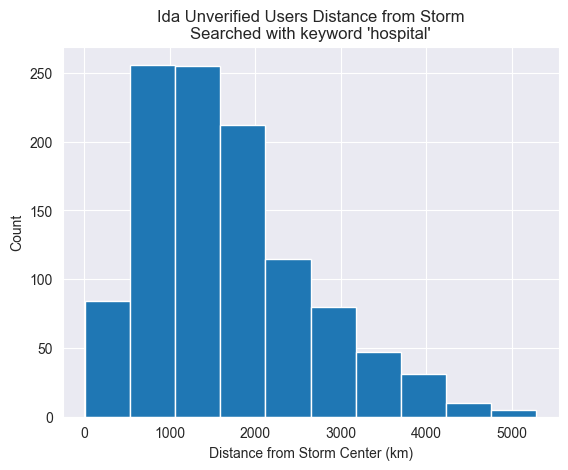

In [91]:
plt.hist(distances2)
plt.title('Ida Unverified Users Distance from Storm\nSearched with keyword \'hospital\'')
plt.xlabel('Distance from Storm Center (km)')
plt.ylabel('Count')
plt.savefig('user analysis/ida_hospital_unverified2.png')
plt.show()

Verified users tend to be closer to storm track than unverified users.

# T-test

Assumptions:
-two groups are independent of each other
-both distributions are normal
-equal variance

In [92]:
import scipy.stats as stats
stats.ttest_ind(distances, distances2)

Ttest_indResult(statistic=-3.758649398489101, pvalue=0.00017838492314530243)

Since the p-value is less than 0.05, we can reject our null hypothesis and conclude that the population means of the two distributions are note equal.

# Distance vs. Followers

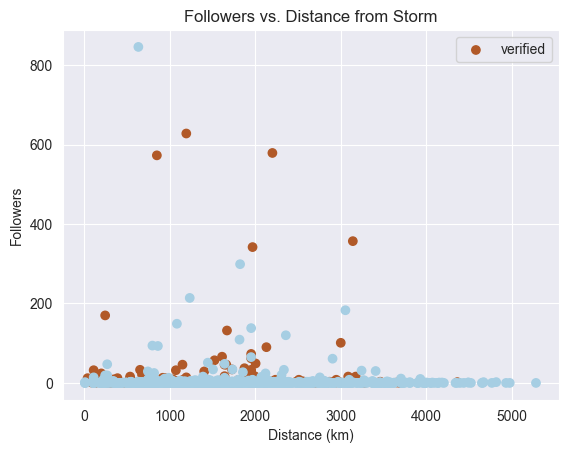

In [30]:
verified['distance'] = distances
unverified['distance'] = distances2
combined = pd.concat([verified, unverified])
# combined = select_users2
combined = combined[combined['retweet'] <= 1e3]
plt.scatter(x=combined['distance'], y=combined['retweet'], c=combined['verified'] == 'verified', cmap='Paired', label=combined['verified'])
plt.legend(labels=['verified', 'unverified'])
plt.title('Followers vs. Distance from Storm')
plt.xlabel('Distance (km)')
plt.ylabel('Followers')
# plt.savefig('user analysis/ida_hospital_followers2.png')
plt.show()

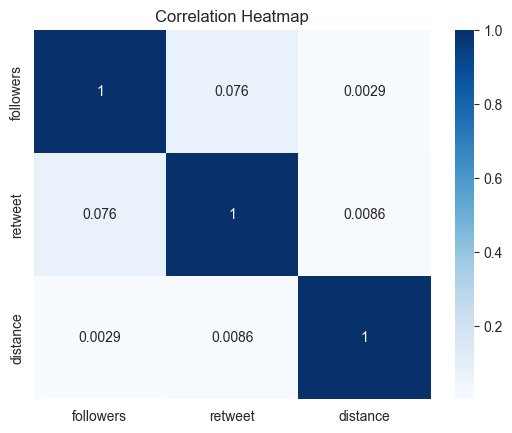

In [100]:
import seaborn as sb
corr = combined.loc[:, ['followers', 'retweet', 'distance']].corr()
sb.heatmap(corr, cmap="Blues", annot=True).set(title='Correlation Heatmap')
plt.savefig('user analysis/Heatmap2.png')
plt.show()

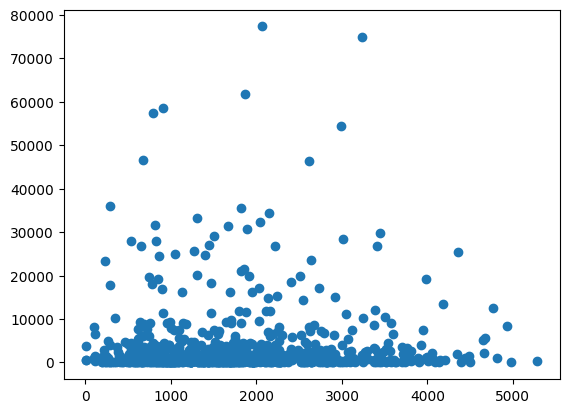

In [347]:
plt.scatter(x=unverified[unverified['followers'] < 1e5]['distance'], y=unverified[unverified['followers'] < 1e5]['followers'])
plt.show()

# Non-verified Users

In [74]:
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

keywords = ['shut', 'down', 'capacity', 'full', 'limit', 'out']
non_verified = []

while start_date <= end_date:
    df = pd.read_excel(r"C:\Users\xiaod\Downloads\Hurricane Ida\Hurricane Ida\storm ida_" + str(start_date) + ".xlsx")
    df = df[~df['text'].str.startswith("RT @", na=False)]
    df = df.drop_duplicates(subset=['text'])
    df = df.reset_index(drop=True)

    for i in range(len(df['text'])):
        tweet = df['text'][i]
        for word in keywords:
            if word in tweet and 'hospital' in tweet:
                if not df['verified'][i]:
                    non_verified.append((df['user'][i], df['description'][i], df['location'][i], df['followers'][i]))
                break

    start_date += delta

non_verified_users = pd.DataFrame(non_verified, columns=['username', 'biography', 'location', 'followers'])
non_verified_users = non_verified_users.drop_duplicates(subset='username')
non_verified_users

,username,biography,location,followers
0,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",DMing THE Hollowed,5498
1,SmhJan,"Word Player, Wife, Mama, Grandma. Sitter of gr...",#GulfCoastRegionTX,697
2,WestergrenJon,Proud I'm in the Resistance Progressive Proud ...,NaN,14483
3,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220
4,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611
...,...,...,...,...
131,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501
132,fraterphoenix,The best way to know me is by reading my stories.,NaN,18
133,EWTNVatican,News + Updates from the heart of the Catholic ...,NaN,35025
134,JoeKanter,Louisiana Department of Health. ER doc and for...,NaN,3302


In [76]:
non_verified_users = non_verified_users.reset_index(drop=True)
non_verified_users = non_verified_users.dropna()
non_verified_users

,username,biography,location,followers
0,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",DMing THE Hollowed,5498
1,SmhJan,"Word Player, Wife, Mama, Grandma. Sitter of gr...",#GulfCoastRegionTX,697
3,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220
4,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611
5,LEWlew48,"MSU Fan,Proud Democrat,jumping for joy Black F...","Georgia, USA",27
...,...,...,...,...
75,ServingIntel,Customized #technology solutions for #hospital...,Guaranteed ROI!,802
77,libbyliberalnyc,"humanist against patriarchy, iconoclast, poet,...","New York, USA",5351
78,Vicky_no_secret,"God first, Driven, Determined, passionate, edu...",Johns Island/Charleston,150
79,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501


In [78]:
accepted = ['New York', 'New York City', 'Milwaukee', 'Seattle']

def get_city(name):
    if ',' in name:
        return name[:name.index(',')]
    else:
        return ''

longitude = []
latitude = []
cities = non_verified_users['location']
cities = cities.apply(lambda x: get_city(str(x)))

def findGeocode(place):
    try:
        geolocator = Nominatim(user_agent="your_app_name")
        return geolocator.geocode(place)
    except GeocoderTimedOut:
        return findGeocode(place)

for i in cities:
    if findGeocode(i) is not None:
        loc = findGeocode(i)
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

non_verified_users['lat'] = latitude
non_verified_users['lon'] = longitude
non_verified_users

,username,biography,location,followers,lat,lon
0,Tallsquall,"#DnDFitness Cosplay Art R/Ts DM, #BirdintheSto...",DMing THE Hollowed,5498,NaN,NaN
1,SmhJan,"Word Player, Wife, Mama, Grandma. Sitter of gr...",#GulfCoastRegionTX,697,NaN,NaN
3,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220,37.566679,126.978291
4,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611,31.263890,-98.545612
5,LEWlew48,"MSU Fan,Proud Democrat,jumping for joy Black F...","Georgia, USA",27,32.329381,-83.113737
...,...,...,...,...,...,...
75,ServingIntel,Customized #technology solutions for #hospital...,Guaranteed ROI!,802,NaN,NaN
77,libbyliberalnyc,"humanist against patriarchy, iconoclast, poet,...","New York, USA",5351,40.712728,-74.006015
78,Vicky_no_secret,"God first, Driven, Determined, passionate, edu...",Johns Island/Charleston,150,NaN,NaN
79,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501,37.779026,-122.419906


In [82]:
non_verified_users = non_verified_users.dropna()
non_verified_users = non_verified_users.reset_index(drop=True)
non_verified_users

,username,biography,location,followers,lat,lon
0,TrumpRussiaTies,"The #TrumpRussiaGuide; mapping its people, ent...","Sol, Sector 0, Alpha Quadrant",3220,37.566679,126.978291
1,tdokester,"Gradually retiring business executive, far lef...","Texas, USA",2611,31.263890,-98.545612
2,LEWlew48,"MSU Fan,Proud Democrat,jumping for joy Black F...","Georgia, USA",27,32.329381,-83.113737
3,AmberSchmidtke,"College professor, medical educator, public he...","Kansas, USA",6913,38.273120,-98.582187
4,pamelarwalker,"Health, public health, natural resources, emer...","St. Louis, Mo.",4335,38.628028,-90.191015
5,draughon_vickie,I have 3 beautiful children and 3 grandbabies ...,"Mississippi, USA",84,32.971528,-89.734850
6,ninigirl84,"Recovering conservative,1A extremist cat lady,...","Dallas, tx",4097,32.776272,-96.796856
7,hannahalabamaa,24 || Married || Long haul COVID advocate || 🏳️‍🌈,"Birmingham, AL",477,52.479699,-1.902691
8,ChristopherNFox,"Work at @CeresNews for social justice, sustain...","Boston, MA",18448,42.355433,-71.060511
9,StuOnGold,47 years trading at CBOT/CME/COMEX. Former Ser...,"Ventura County, CA.",2223,34.445825,-119.077936


(25.0, 50.0)

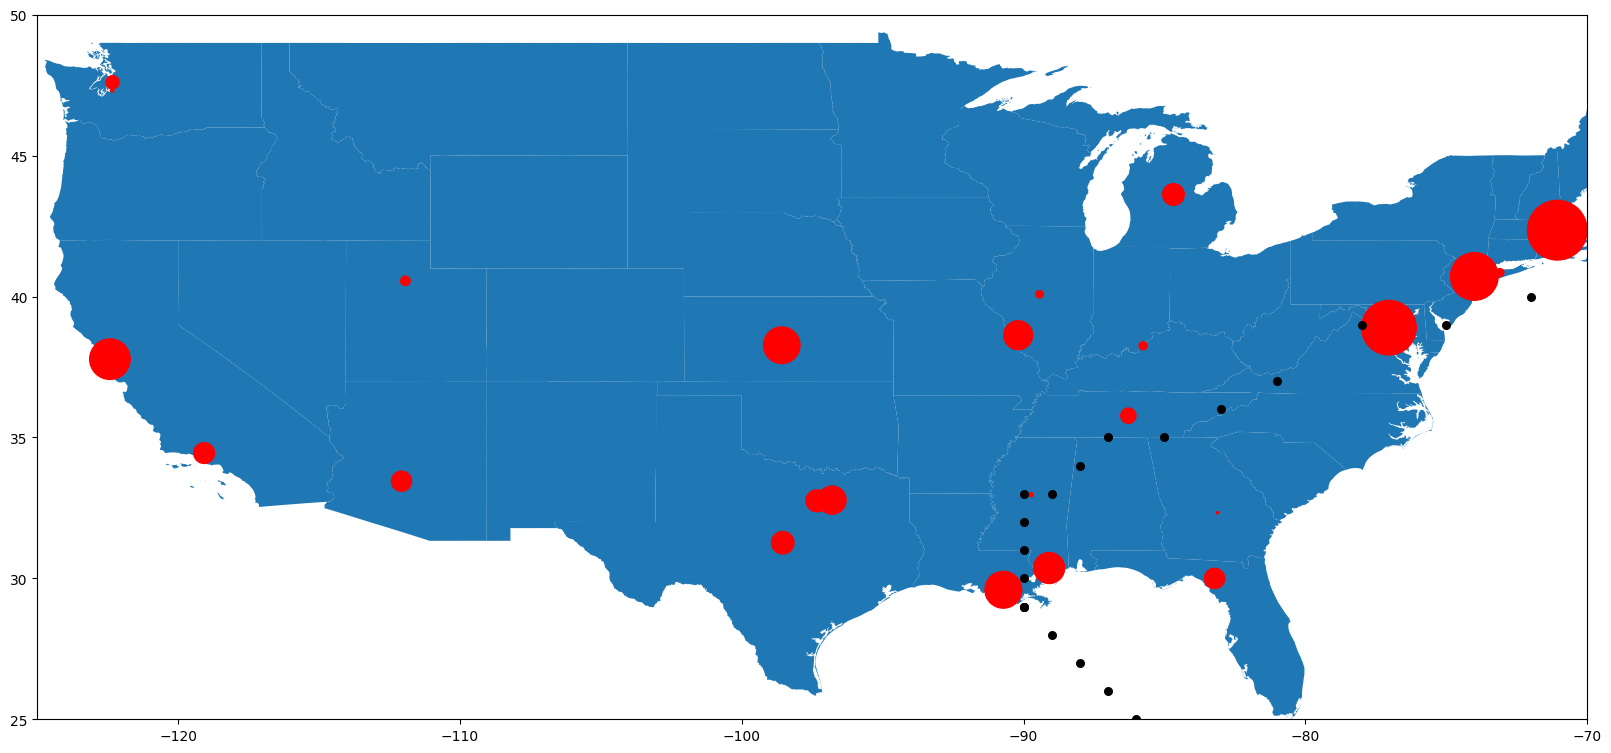

In [85]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(non_verified_users['lon'], non_verified_users['lat'])]
gdf = GeoDataFrame(non_verified_users, geometry=geometry)
ida_track = pd.read_csv('ida_track.csv')
ida_track['Lat'] = ida_track['Lat'].apply(lambda x: float(x[0:4]))
ida_track['Lon'] = ida_track['Lon'].apply(lambda x: -1 * float(x[0:4]))
geometry2 = [Point(xy) for xy in zip(ida_track['Lon'], ida_track['Lat'])]
ida_gdf = GeoDataFrame(ida_track, geometry=geometry2)

usa = gpd.read_file(r"C:\Users\xiaod\OneDrive\Desktop\Research\HurricaneProject\cb_2018_us_state_500k\cb_2018_us_state_500k.shp")
ax = usa.plot(figsize=(20,15))
gdf.plot(ax=ax, color='red', markersize=non_verified_users['followers']/10, marker = 'o', label= 'pos')
ida_gdf.plot(ax=ax, color='black', markersize=30)

ax.set_xlim(-125, -70)
ax.set_ylim(25, 50)

In [87]:
non_verified_users.sort_values(by='followers', ascending=False)

,username,biography,location,followers,lat,lon
8,ChristopherNFox,"Work at @CeresNews for social justice, sustain...","Boston, MA",18448,42.355433,-71.060511
20,bhrenton,Tracking vaccine rollout with @VermontDFR and ...,"Washington, DC",15429,38.895037,-77.036543
28,allidoismix,Real-Time News & Commentary 24/7/365 🌎🌍🌏\nCryp...,"New York, NY",11749,40.712728,-74.006015
15,InhellJourney,RESISTER. vaccinated; Biden/Harris. DEM. Inves...,"Washington, USA",9302,38.895037,-77.036543
34,cworldreport,Catholic World Report provides a Catholic pers...,"San Francisco, CA",8501,37.779026,-122.419906
27,HoumaToday,Newspaper in southern Louisiana providing comp...,"Houma, La.",7011,29.595770,-90.719535
3,AmberSchmidtke,"College professor, medical educator, public he...","Kansas, USA",6913,38.273120,-98.582187
33,libbyliberalnyc,"humanist against patriarchy, iconoclast, poet,...","New York, USA",5351,40.712728,-74.006015
19,ProfCiara,Curious about how the world works. Focused on ...,"Gulfport, FL",4967,30.367420,-89.092816
4,pamelarwalker,"Health, public health, natural resources, emer...","St. Louis, Mo.",4335,38.628028,-90.191015


# Individual Accounts Analysis

In [79]:
start_date = datetime.date(2021, 8, 26)
end_date = datetime.date(2021, 9, 13)
delta = datetime.timedelta(days=1)

official = ['fema']

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_" + str(start_date) + ".csv")

    for i in range(len(df['text'])):
        if df['user'][i] in official:
            print('Time:', str(df['time'][i]), 'User:', df['user'][i])
            print(df['text'][i], '\n')

    start_date += delta

Time: Fri Aug 27 20:43:51 +0000 2021 User: fema
RT @distressline: If you live in an area forecast for possible impacts from Tropical Storm #Ida &amp; are feeling anxious, overwhelmed, isolated or other distress, you're not alone. The national Disaster @Distressline 1-800-985-5990 offers 24/7 emotional support. https://t.co/WxhWnLX8Wq #TalkWithUs 📲 

Time: Fri Aug 27 20:43:18 +0000 2021 User: fema
RT @CDCEnvironment: Depending on the path of a #storm or #hurricane, your home may not be the safest place to be. 

Be prepared to go if asked to evacuate by local authorities. 

Here are a few things you can do to help improve your evacuation time: https://t.co/6IT2pnXA71. #Ida https://t.co/BjKrlQSKTd 

Time: Fri Aug 27 19:44:15 +0000 2021 User: fema
RT @MSEMA: Mississippi, now is the time to build your disaster supply kit in preparation of Ida. 
This is a storm that could impact not just the coast but central and northern portions of the state. 
The First 72 Is On You! #HurricaneIda https://

In [41]:
df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Ida CSV\storm ida_2021-08-27.csv")
popular_tweets = df[df['retweet'] >= 100]
popular_tweets['text'] = popular_tweets['text'].astype('str')
popular_tweets = popular_tweets.drop_duplicates(subset='text').reset_index(drop=True)
popular_tweets

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
0,1,DivaKnevil,Vegan 🌱 Gin-Soaked Secular Humanist. An Ex-Pat...,False,Washington D.C,2528,Fri Aug 27 23:59:54 +0000 2021,1.431406e+18,"RT @POTUS: This afternoon, I held a call with ...",4260,...,NaN,13781071.0,Fri Aug 27 22:31:17 +0000 2021,1.431384e+18,"This afternoon, I held a call with the head of...",4260.0,NaN,en,NaN,NaN
1,2,TheresaC1231,"A0C Director, Animal lover, will add ALMOST al...",False,NaN,1315,Fri Aug 27 23:59:52 +0000 2021,1.431406e+18,RT @StrictlyChristo: Hurricane Ida is a myth‼️...,209,...,"Santa Cruz, California",23986.0,Fri Aug 27 23:42:53 +0000 2021,1.431402e+18,Hurricane Ida is a myth‼️\n\nDon't get fooled!...,209.0,NaN,en,NaN,NaN
2,4,CharityChicken,I cross Ohio roads for charitable health cause...,False,"Dayton, OH",2203,Fri Aug 27 23:59:49 +0000 2021,1.431406e+18,RT @blkahn: Hurricane Ida is going to follow a...,155,...,NYC,37810.0,Fri Aug 27 19:39:36 +0000 2021,1.431341e+18,Hurricane Ida is going to follow a trail of ho...,155.0,NaN,en,NaN,NaN
3,9,CharityChicken,I cross Ohio roads for charitable health cause...,False,"Dayton, OH",2203,Fri Aug 27 23:59:32 +0000 2021,1.431406e+18,RT @NBCNews: BREAKING: Hurricane Ida now forec...,451,...,"New York, NY",8605369.0,Fri Aug 27 21:02:38 +0000 2021,1.431362e+18,BREAKING: Hurricane Ida now forecast to streng...,451.0,NaN,en,NaN,NaN
4,14,BTRWx,B.S. in Earth Science (Atmospheric Science Con...,False,"Alexandria, VA (FFX Cnty)",871,Fri Aug 27 23:59:22 +0000 2021,1.431406e+18,RT @NHC_Atlantic: Hurricane #Ida is approachin...,562,...,"Miami, FL",978388.0,Fri Aug 27 21:03:09 +0000 2021,1.431362e+18,Hurricane #Ida is approaching western Cuba and...,562.0,NaN,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,27367,AP,"News from The Associated Press, and a taste of...",True,Global,15292044,Fri Aug 27 03:11:45 +0000 2021,1.431092e+18,BREAKING: Forecasters say a hurricane watch ha...,116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,27601,NWSNewOrleans,Official Twitter account for the National Weat...,True,"New Orleans, Louisiana",67767,Fri Aug 27 03:01:07 +0000 2021,1.431089e+18,🌀 10:00 p.m.: Here is the latest forecast from...,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,27846,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978414,Fri Aug 27 02:52:03 +0000 2021,1.431087e+18,Tropical Storm #Ida Advisory 3: Hurricane Watc...,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,28228,NOLAnews,Latest news and updates from the Pulitzer Priz...,True,"New Orleans, LA",270609,Fri Aug 27 02:00:18 +0000 2021,1.431074e+18,Three major Sewerage &amp; Water Board pumps a...,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
popular_tweets = popular_tweets[~popular_tweets['text'].str.startswith("RT @", na=False)]
popular_tweets.sort_values(by='retweet', ascending=False)

,Unnamed: 0,user,description,verified,location,followers,time,id,text,retweet,...,rt_location,rt_followers,rt_time,rt_id,rt_text,rt_retweet,rt_reply,rt_language,longitude,lattitude
35,2855,POTUS,"46th President of the United States, husband t...",True,NaN,13781072,Fri Aug 27 22:31:17 +0000 2021,1.431384e+18,"This afternoon, I held a call with the head of...",4260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,13826,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978407,Fri Aug 27 17:16:58 +0000 2021,1.431305e+18,1:15 PM EDT: Data from an Air Force Reserve Hu...,842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,6390,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978388,Fri Aug 27 21:03:09 +0000 2021,1.431362e+18,Hurricane #Ida is approaching western Cuba and...,562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,24510,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978413,Fri Aug 27 09:47:56 +0000 2021,1.431192e+18,Here are the 5 AM EDT August 27th Key Messages...,522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,6424,NBCNews,"News updates from around the 🌎, all day, every...",True,"New York, NY",8605370,Fri Aug 27 21:02:38 +0000 2021,1.431362e+18,BREAKING: Hurricane Ida now forecast to streng...,451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,13670,weatherchannel,The World's Leading Weather Provider. Home to ...,True,"Atlanta, GA",3920323,Fri Aug 27 17:18:30 +0000 2021,1.431305e+18,BREAKING: #Ida has rapidly intensified and is ...,441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,9337,fema,Our story of supporting citizens & first respo...,True,United States,823912,Fri Aug 27 19:16:04 +0000 2021,1.431335e+18,We are monitoring the development and path of ...,385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,18085,NHC_Atlantic,This is the primary official Twitter account f...,True,"Miami, FL",978410,Fri Aug 27 15:11:51 +0000 2021,1.431273e+18,Ida has strengthened into a 65-mph tropical st...,383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,22944,Sheril_,"Scientist & author. Climate x Ag, Politics & S...",True,NaN,14386,Fri Aug 27 11:44:57 +0000 2021,1.431221e+18,Gulf waters are warm which worries me watching...,344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,9482,SteveWAFB,AMS certified meteorologist at @WAFB in Baton ...,True,"Baton Rouge, LA",14695,Fri Aug 27 19:09:25 +0000 2021,1.431333e+18,Multiple models now taking #Ida to Cat. 4 inte...,312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
